# Projeto com Feedback 3 - Análise de Risco no Transporte Público

# Descrição projeto
Passageiros ou pedestres são as maiores vítimas dos incidentes? Essas e outras perguntas devem ser respondidas através da análise de dados reais disponíveis publicamente. Este projeto não requer Machine Learning e seu trabalho é aplicar suas habilidades de análise e responder diversas perguntas de negócio através de gráficos e storytelling.

Quais incidentes de trânsito ocorrem com mais frequência? 

Qual a faixa etária que mais se envolve em incidentes de trânsito? 

Qual o evento mais comum nos incidentes?

**Base dados**

Para a construção desse projeto, recomendamos a utilização da Linguagem Python e Linguagem SQL e o dataset disponível para download no link abaixo:

https://data.world/makeovermonday/2018w51

**Objetivo**

O conjunto de dados lista incidentes de trânsito ocorridos na cidade de Londres. Seu trabalho é analisar os dados e construir gráficos que respondam a essas 10 perguntas abaixo:

- 1- Qual a quantidade de incidentes por gênero?

- 2- Qual faixa etária esteve mais envolvida nos incidentes?

- 3- Qual o percentual de incidentes por tipo de evento (Incident Event Type)?

- 4- Como foi a evolução de incidentes por mês ao longo do tempo?

- 5- Quando o incidente foi “Collision Incident” em qual mês houve o maior número de incidentes envolvendo pessoas do sexo feminino?

- 6- Qual foi a média de incidentes por mês envolvendo crianças (Child)?

- 7- Considerando a descrição de incidente como “Injuries treated on scene” (coluna Injury Result Description), qual o total de incidentes de pessoas do sexo masculino e sexo feminino?

- 8- No ano de 2017 em qual mês houve mais incidentes com idosos (Elderly)?

- 9- Considerando o Operador qual a distribuição de incidentes ao longo do tempo?

- 10- Qual o tipo de incidente mais comum com ciclistas?

# Projeto - Análise de dados

Nesse projeto, foi realizada uma análise exploratória de dados utilizando a linguagem de programação Python, com o objetivo de extrair insights importantes relacionados ao tema "Risco no Transporte Público". O transporte público é uma parte essencial da vida urbana, sendo utilizado por milhões de pessoas diariamente em diversas cidades ao redor do mundo. 

No entanto, esse meio de locomoção também apresenta desafios e preocupações relacionadas à segurança e ao risco envolvido. A análise exploratória de dados é uma abordagem fundamental para entender e visualizar informações relevantes em grandes conjuntos de dados. Ela permite que sejam obtidas informações valiosas e padrões ocultos que podem ajudar a melhorar a segurança e a eficiência do transporte público, tornando-o mais confiável e seguro para os passageiros. Nessa análise, foram utilizadas diversas técnicas e bibliotecas disponíveis em Python para explorar os dados coletados. Foram realizadas etapas de limpeza, transformação e preparação dos dados, visando garantir a qualidade e a coerência das informações. 

Em seguida, gráficos e visualizações foram criados para facilitar a compreensão dos padrões e tendências presentes nos dados. Alguns dos insights importantes. Esses insights fornecem uma base sólida para que as autoridades responsáveis pelo transporte público possam tomar decisões mais informadas e eficientes na gestão de riscos e na implementação de estratégias de prevenção. A análise exploratória de dados, em conjunto com o uso de técnicas de aprendizado de máquina e inteligência artificial, pode continuar a ser uma ferramenta poderosa para melhorar a segurança e a qualidade do transporte público, proporcionando uma experiência mais segura e tranquila para os usuários.

In [1]:
# Importação das bibliotecas 

# Bibliotecas sistema
import re
import unicodedata
import itertools

# Biblioteca para manipulação de arquivos
import pandas as pd
import numpy as np 

# Visualização de dados
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly
import plotly.express as px

# Carregar as versões das bibliotecas
import watermark

# Versões das bibliotecas
%reload_ext watermark
%watermark -a "Versões das bibliotecas" --iversions

# Configuração para os gráficos largura e layout dos graficos
plt.rcParams["figure.figsize"] = (25, 20)

plt.style.use('fivethirtyeight')
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

m.rcParams['axes.labelsize'] = 15
m.rcParams['xtick.labelsize'] = 15
m.rcParams['ytick.labelsize'] = 15
m.rcParams['text.color'] = 'k'

# Warnings retirar alertas 
import warnings
warnings.filterwarnings("ignore")

# Versão do python
from platform import python_version
print('Versão python neste Jupyter Notebook:', python_version())

Author: Versões das bibliotecas

numpy     : 1.24.3
watermark : 2.4.2
re        : 2.2.1
matplotlib: 3.7.1
seaborn   : 0.12.2
plotly    : 5.9.0
pandas    : 2.0.3

Versão python neste Jupyter Notebook: 3.9.13


# Base dados

In [2]:
# Carregando base dados
data = pd.read_excel("TFL Bus Safety.xlsx")
data

,Year,Date Of Incident,Route,Operator,Group Name,Bus Garage,Borough,Injury Result Description,Incident Event Type,Victim Category,Victims Sex,Victims Age
0,2015,2015-01-01,1,London General,Go-Ahead,Garage Not Available,Southwark,Injuries treated on scene,Onboard Injuries,Passenger,Male,Child
1,2015,2015-01-01,4,Metroline,Metroline,Garage Not Available,Islington,Injuries treated on scene,Onboard Injuries,Passenger,Male,Unknown
2,2015,2015-01-01,5,East London,Stagecoach,Garage Not Available,Havering,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly
3,2015,2015-01-01,5,East London,Stagecoach,Garage Not Available,None London Borough,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly
4,2015,2015-01-01,6,Metroline,Metroline,Garage Not Available,Westminster,Reported Minor Injury - Treated at Hospital,Onboard Injuries,Pedestrian,Female,Elderly
...,...,...,...,...,...,...,...,...,...,...,...,...
23153,2018,2018-09-01,(blank),East London,Stagecoach,West Ham,Newham,Injuries treated on scene,Personal Injury,Bus Driver,Male,Adult
23154,2018,2018-09-01,(blank),London United,London United,Hounslow,Not specified,Injuries treated on scene,Personal Injury,Bus Driver,Male,Adult
23155,2018,2018-09-01,(blank),London United,London United,Park Royal,Harrow,Injuries treated on scene,Slip Trip Fall,Operational Staff,Male,Adult
23156,2018,2018-09-01,(blank),London United,London United,Shepherds Bush,Hammersmith & Fulham,Injuries treated on scene,Personal Injury,Bus Driver,Male,Adult


In [3]:
# Exibido 5 primeiros dados de data_train
data.head()

,Year,Date Of Incident,Route,Operator,Group Name,Bus Garage,Borough,Injury Result Description,Incident Event Type,Victim Category,Victims Sex,Victims Age
0,2015,2015-01-01,1,London General,Go-Ahead,Garage Not Available,Southwark,Injuries treated on scene,Onboard Injuries,Passenger,Male,Child
1,2015,2015-01-01,4,Metroline,Metroline,Garage Not Available,Islington,Injuries treated on scene,Onboard Injuries,Passenger,Male,Unknown
2,2015,2015-01-01,5,East London,Stagecoach,Garage Not Available,Havering,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly
3,2015,2015-01-01,5,East London,Stagecoach,Garage Not Available,None London Borough,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly
4,2015,2015-01-01,6,Metroline,Metroline,Garage Not Available,Westminster,Reported Minor Injury - Treated at Hospital,Onboard Injuries,Pedestrian,Female,Elderly


In [4]:
# Exibido 5 últimos dados de data_train
data.tail()

,Year,Date Of Incident,Route,Operator,Group Name,Bus Garage,Borough,Injury Result Description,Incident Event Type,Victim Category,Victims Sex,Victims Age
23153,2018,2018-09-01,(blank),East London,Stagecoach,West Ham,Newham,Injuries treated on scene,Personal Injury,Bus Driver,Male,Adult
23154,2018,2018-09-01,(blank),London United,London United,Hounslow,Not specified,Injuries treated on scene,Personal Injury,Bus Driver,Male,Adult
23155,2018,2018-09-01,(blank),London United,London United,Park Royal,Harrow,Injuries treated on scene,Slip Trip Fall,Operational Staff,Male,Adult
23156,2018,2018-09-01,(blank),London United,London United,Shepherds Bush,Hammersmith & Fulham,Injuries treated on scene,Personal Injury,Bus Driver,Male,Adult
23157,2018,2018-09-01,(blank),Metroline,Metroline,Holloway,Islington,Injuries treated on scene,Personal Injury,Other,Unknown,Unknown


In [5]:
# Número de linhas e colunas
data.shape

(23158, 12)

In [8]:
# Verificando informações das variaveis
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23158 entries, 0 to 23157
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Year                       23158 non-null  int64         
 1   Date Of Incident           23158 non-null  datetime64[ns]
 2   Route                      23158 non-null  object        
 3   Operator                   23158 non-null  object        
 4   Group Name                 23158 non-null  object        
 5   Bus Garage                 23158 non-null  object        
 6   Borough                    23158 non-null  object        
 7   Injury Result Description  23158 non-null  object        
 8   Incident Event Type        23158 non-null  object        
 9   Victim Category            23158 non-null  object        
 10  Victims Sex                23158 non-null  object        
 11  Victims Age                23158 non-null  object        
dtypes: d

In [9]:
# Exibido tipos de dados
data.dtypes

Year                                  int64
Date Of Incident             datetime64[ns]
Route                                object
Operator                             object
Group Name                           object
Bus Garage                           object
Borough                              object
Injury Result Description            object
Incident Event Type                  object
Victim Category                      object
Victims Sex                          object
Victims Age                          object
dtype: object

In [10]:
# Exibindo estatísticas descritivas visualizar alguns detalhes estatísticos básicos como percentil, média, padrão, etc. 
# De um quadro de dados ou uma série de valores numéricos.

data.describe().T

,count,mean,min,25%,50%,75%,max,std
Year,23158.0,2016.449607,2015.0,2016.0,2016.0,2017.0,2018.0,1.074073
Date Of Incident,23158,2016-11-22 09:11:29.282321408,2015-01-01 00:00:00,2016-01-01 00:00:00,2016-12-01 00:00:00,2017-11-01 00:00:00,2018-09-01 00:00:00,NaN


# Limpeza dados

In [11]:
# Identificar e tratar valores ausentes

# Verificar a quantidade de valores ausentes em cada coluna
print(data.isnull().sum())

Year                         0
Date Of Incident             0
Route                        0
Operator                     0
Group Name                   0
Bus Garage                   0
Borough                      0
Injury Result Description    0
Incident Event Type          0
Victim Category              0
Victims Sex                  0
Victims Age                  0
dtype: int64


In [12]:
# Total de colunas e linhas 

print("Números de linhas: {}" .format(data.shape[0]))
print("Números de colunas: {}" .format(data.shape[1]))

Números de linhas: 23158
Números de colunas: 12


In [13]:
# Exibindo valores ausentes e valores únicos

print("\nMissing values :  ", data.isnull().sum().values.sum())
print("\nUnique values :  \n",data.nunique())


Missing values :   0

Unique values :  
 Year                           4
Date Of Incident              45
Route                        612
Operator                      25
Group Name                    14
Bus Garage                    84
Borough                       35
Injury Result Description      4
Incident Event Type           10
Victim Category               17
Victims Sex                    3
Victims Age                    5
dtype: int64


In [15]:
# Remover linhas duplicadas (considerando todas as colunas)
data.drop_duplicates(inplace=True)

In [16]:
# Remover linhas que contenham valores nulos em qualquer coluna
data.dropna(inplace=True)

In [18]:
# Preencher valores nulos com o valor anterior (forward fill)
data.fillna(method='ffill', inplace=True)

In [19]:
# Preencher valores nulos com o valor posterior (backward fill)
data.fillna(method='bfill', inplace=True)

In [20]:
# Interpolar valores nulos linearmente
data.interpolate(method='linear', inplace=True)

In [22]:
# Preencher valores nulos apenas na coluna "Victims Age" com 0
data["Victims Age"].fillna(0, inplace=True)

In [24]:
print(data.isnull().sum())

Year                         0
Date Of Incident             0
Route                        0
Operator                     0
Group Name                   0
Bus Garage                   0
Borough                      0
Injury Result Description    0
Incident Event Type          0
Victim Category              0
Victims Sex                  0
Victims Age                  0
dtype: int64


# Quais incidentes de trânsito ocorrem com mais frequência?

In [25]:
data["Injury Result Description"].value_counts()

Injury Result Description
Injuries treated on scene                                          15933
Taken to Hospital – Reported Serious Injury or Severity Unknown     2830
Reported Minor Injury - Treated at Hospital                         2659
Fatal                                                                 42
Name: count, dtype: int64

In [26]:
# Contando o número de ocorrências de cada tipo de incidente de trânsito
incidentes_contagem = data['Incident Event Type'].value_counts()
incidentes_contagem

Incident Event Type
Slip Trip Fall             6558
Onboard Injuries           5921
Personal Injury            4343
Collision Incident         3817
Assault                     574
Activity Incident Event     111
Vandalism Hooliganism        71
Safety Critical Failure      61
Fire                          5
Robbery                       3
Name: count, dtype: int64

In [27]:
# Verificando e removendo valores ausentes na coluna "Victims Age"
df_transito = data.dropna(subset=['Victims Age'])

In [28]:
# Filtro para considerar apenas os incidentes de trânsito
df_transito = data[data['Incident Event Type'] == 'Personal Injury']
df_transito

,Year,Date Of Incident,Route,Operator,Group Name,Bus Garage,Borough,Injury Result Description,Incident Event Type,Victim Category,Victims Sex,Victims Age
6181,2016,2016-10-01,1,London General,Go-Ahead,Mandela Way (London General),Camden,Injuries treated on scene,Personal Injury,Passenger,Female,Adult
6186,2016,2016-10-01,3,Abellio London,Abellio,Battersea (Abellio London),Lambeth,Injuries treated on scene,Personal Injury,Passenger,Female,Unknown
6188,2016,2016-10-01,4,Metroline,Metroline,Holloway,City of London,Reported Minor Injury - Treated at Hospital,Personal Injury,Passenger,Female,Adult
6193,2016,2016-10-01,5,East London,Stagecoach,Barking (East London Buses),Havering,Injuries treated on scene,Personal Injury,Passenger,Female,Child
6196,2016,2016-10-01,8,East London,Stagecoach,Bow,Tower Hamlets,Injuries treated on scene,Personal Injury,Passenger,Male,Child
...,...,...,...,...,...,...,...,...,...,...,...,...
23141,2018,2018-09-01,U3,Metroline West,Metroline,Uxbridge,Hillingdon,Injuries treated on scene,Personal Injury,Passenger,Female,Unknown
23153,2018,2018-09-01,(blank),East London,Stagecoach,West Ham,Newham,Injuries treated on scene,Personal Injury,Bus Driver,Male,Adult
23154,2018,2018-09-01,(blank),London United,London United,Hounslow,Not specified,Injuries treated on scene,Personal Injury,Bus Driver,Male,Adult
23156,2018,2018-09-01,(blank),London United,London United,Shepherds Bush,Hammersmith & Fulham,Injuries treated on scene,Personal Injury,Bus Driver,Male,Adult


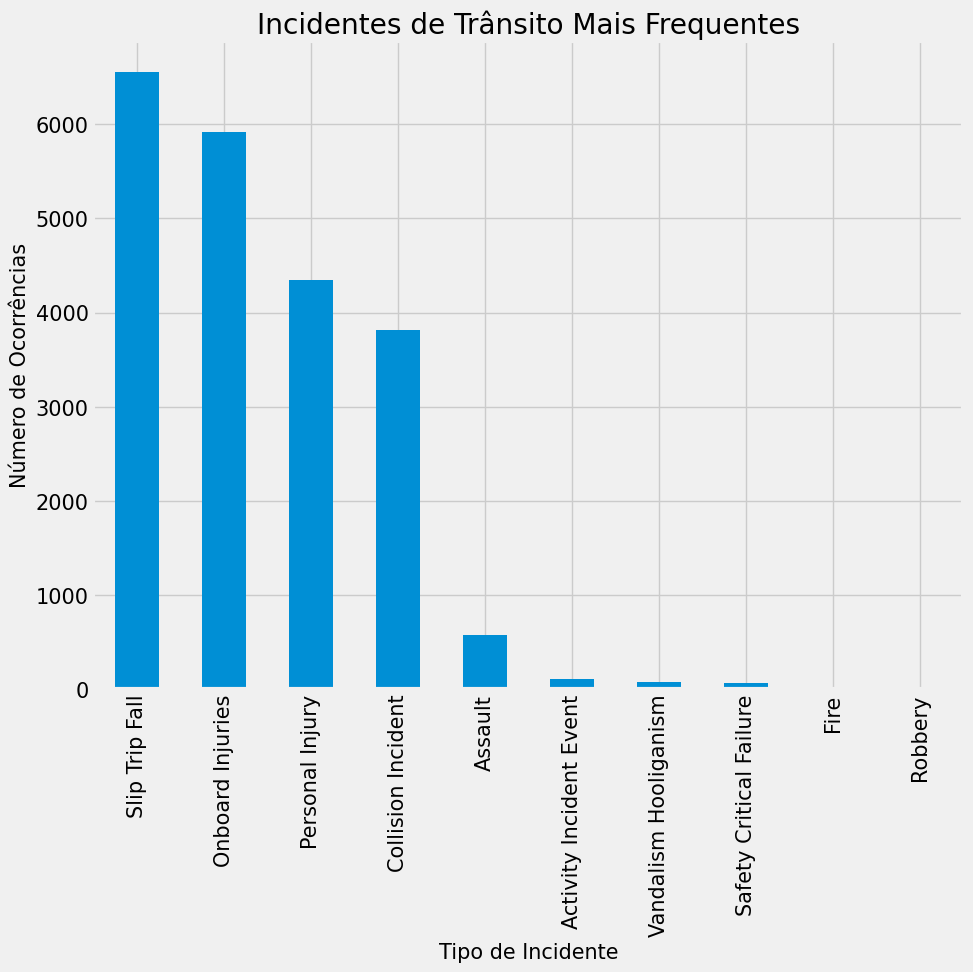

<Figure size 2500x2000 with 0 Axes>

In [96]:
# Plotar o gráfico de barras
plt.figure(figsize=(10, 8))
incidentes_contagem.plot(kind='bar')
plt.xlabel('Tipo de Incidente')
plt.ylabel('Número de Ocorrências')
plt.title('Incidentes de Trânsito Mais Frequentes')
plt.show()
plt.savefig("img/001.png")

# Qual a faixa etária que mais se envolve em incidentes de trânsito?

In [30]:
data["Incident Event Type"].value_counts()

Incident Event Type
Slip Trip Fall             6558
Onboard Injuries           5921
Personal Injury            4343
Collision Incident         3817
Assault                     574
Activity Incident Event     111
Vandalism Hooliganism        71
Safety Critical Failure      61
Fire                          5
Robbery                       3
Name: count, dtype: int64

In [31]:
# Filtro para considerar apenas os incidentes de trânsito
df_transito = data[data['Incident Event Type'] == 'Incidente de Colisão']

In [32]:
# Verificando e removendo valores ausentes na coluna "Victims Age"
df_transito = df_transito.dropna(subset=['Victims Age'])

In [33]:
# Definindo as faixas etárias
faixas_etarias = [0, 17, 25, 40, 60, float('inf')]
faixas_etarias_nomes = ['0-17', '18-25', '26-40', '41-60', '60+']

# Criando a coluna "Faixa Etária" com base nas faixas definidas
df_transito['Faixa Etária'] = pd.cut(df_transito['Victims Age'], bins=faixas_etarias, labels=faixas_etarias_nomes)

# Contando o número de ocorrências em cada faixa etária
contagem_faixa_etaria = df_transito['Faixa Etária'].value_counts()

# Encontrando a faixa etária com o maior número de ocorrências
faixa_etaria_mais_frequente = contagem_faixa_etaria.idxmax()

print(f"A faixa etária que mais se envolve em incidentes de trânsito é: {faixa_etaria_mais_frequente}")


A faixa etária que mais se envolve em incidentes de trânsito é: 0-17


In [34]:
# Criando a coluna "Faixa Etária" com base nas faixas definidas
df_transito['Faixa Etária'] = pd.cut(df_transito['Victims Age'], bins=faixas_etarias, labels=faixas_etarias_nomes)

# Contando o número de ocorrências em cada faixa etária
contagem_faixa_etaria = df_transito['Faixa Etária'].value_counts()
contagem_faixa_etaria

Faixa Etária
0-17     0
18-25    0
26-40    0
41-60    0
60+      0
Name: count, dtype: int64

# Qual o evento mais comum nos incidentes?

In [35]:
# Contando o número de ocorrências de cada tipo de evento
eventos_contagem = data['Incident Event Type'].value_counts()
eventos_contagem

Incident Event Type
Slip Trip Fall             6558
Onboard Injuries           5921
Personal Injury            4343
Collision Incident         3817
Assault                     574
Activity Incident Event     111
Vandalism Hooliganism        71
Safety Critical Failure      61
Fire                          5
Robbery                       3
Name: count, dtype: int64

In [36]:
# Encontrando o evento mais comum
evento_mais_comum = eventos_contagem.idxmax()
print(f"O evento mais comum nos incidentes é: {evento_mais_comum}")

O evento mais comum nos incidentes é: Slip Trip Fall


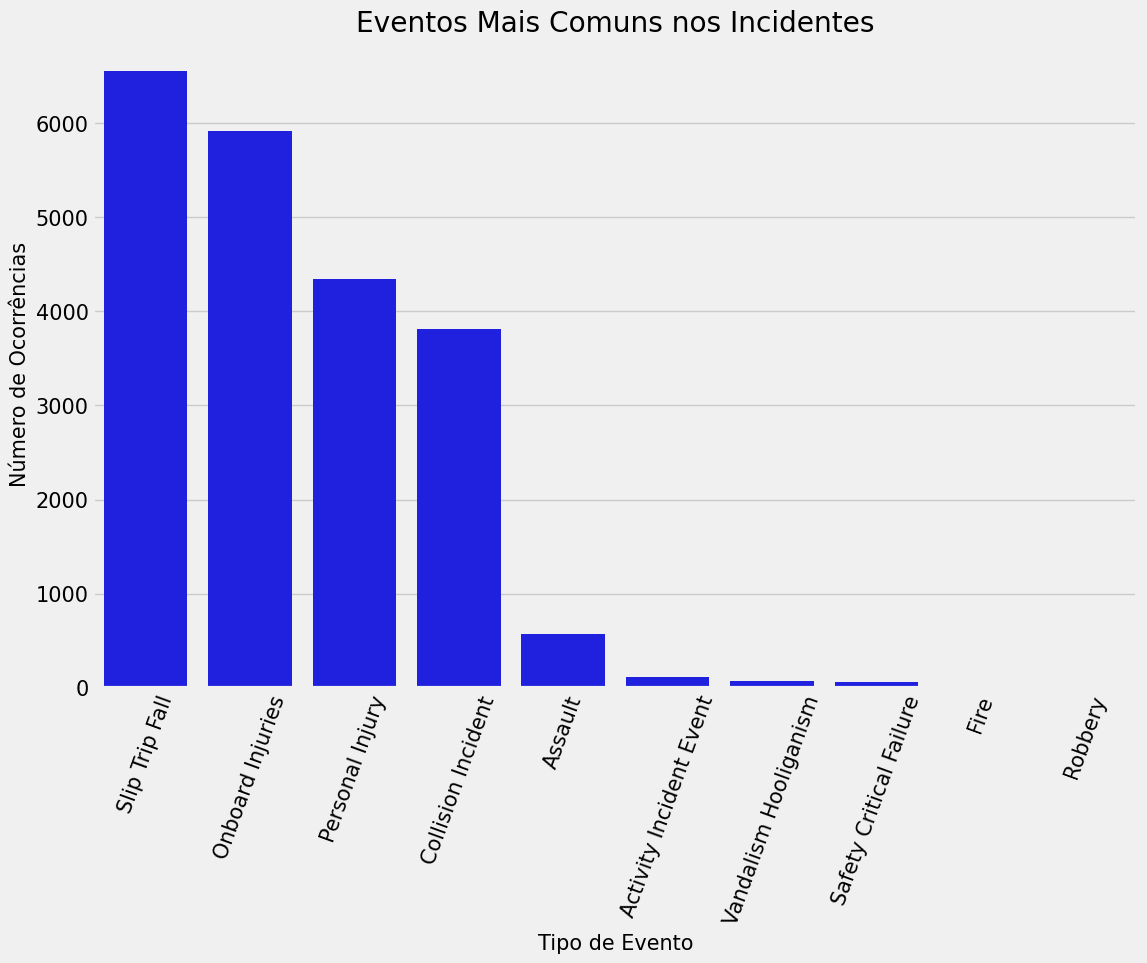

In [41]:
# Plotar o gráfico de barras com Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x=eventos_contagem.index, y=eventos_contagem.values, color="Blue")
plt.xlabel('Tipo de Evento')
plt.ylabel('Número de Ocorrências')
plt.title('Eventos Mais Comuns nos Incidentes')
plt.xticks(rotation=70)  # Rotaciona os rótulos do eixo x para facilitar a leitura
plt.savefig("img/02.png")
plt.show()

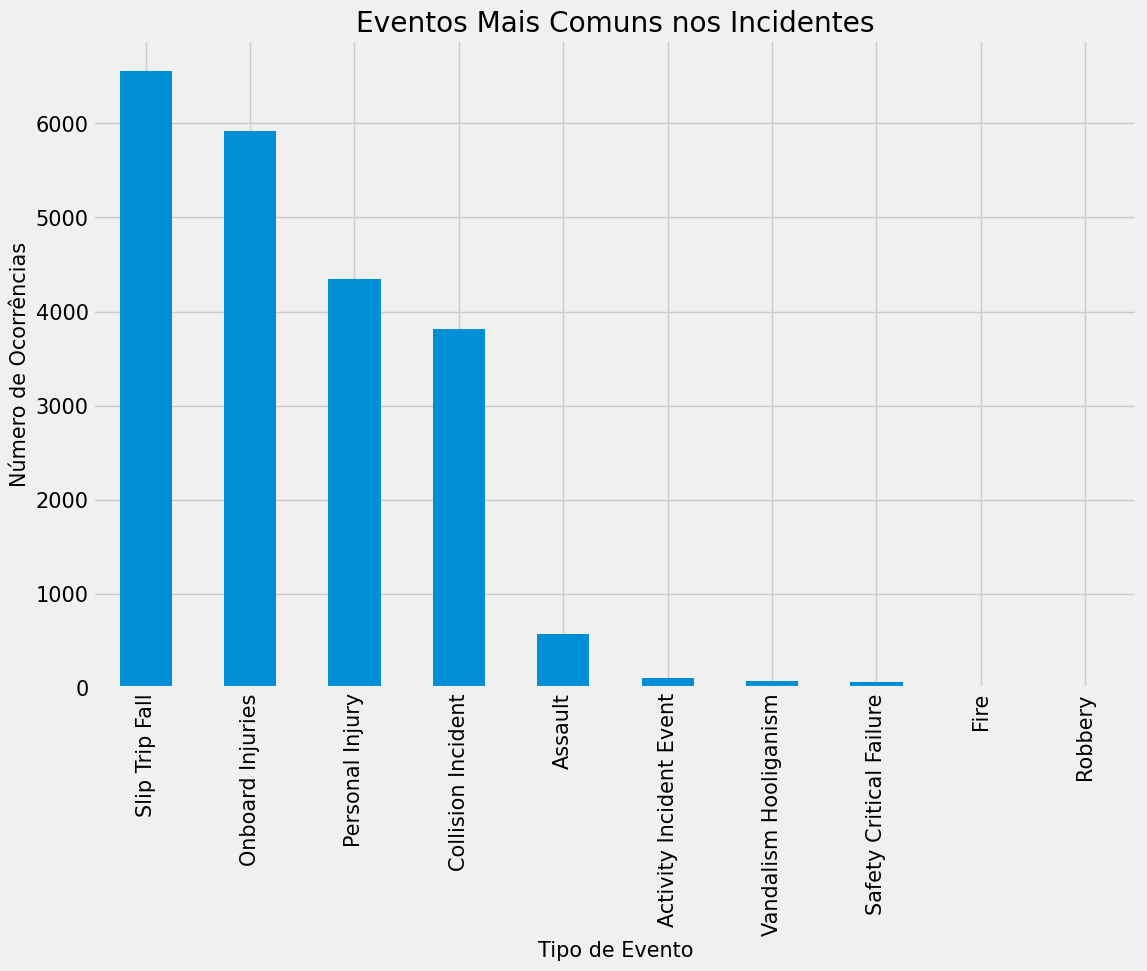

In [42]:
# Plotar o gráfico de barras
plt.figure(figsize=(12, 8))
eventos_contagem.plot(kind='bar')
plt.xlabel('Tipo de Evento')
plt.ylabel('Número de Ocorrências')
plt.title('Eventos Mais Comuns nos Incidentes')
plt.savefig("img/03.png")
plt.show()

# Pergunta 1 - Qual a quantidade de incidentes por gênero?

In [43]:
contagem_por_genero = data['Victims Sex'].value_counts()
contagem_por_genero

Victims Sex
Female     10939
Male        7410
Unknown     3115
Name: count, dtype: int64

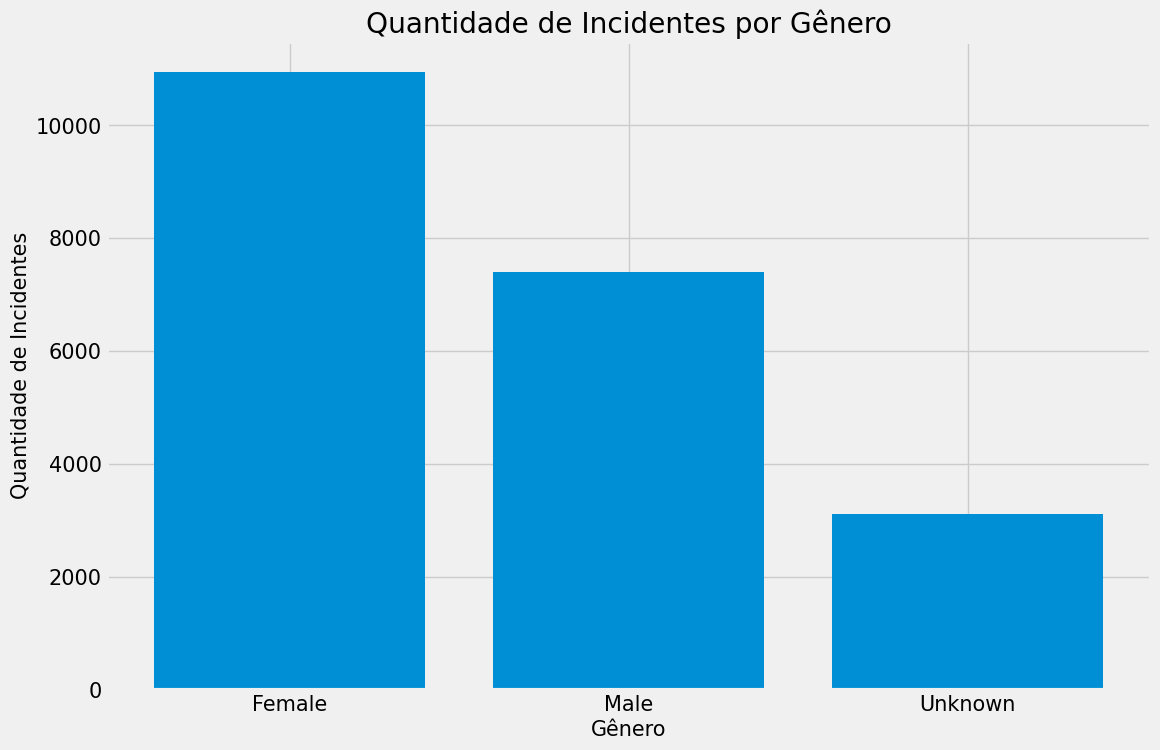

In [97]:
# Plotar o gráfico de barras
plt.figure(figsize=(12, 8))
plt.bar(contagem_por_genero.index, contagem_por_genero.values)
plt.xlabel('Gênero')
plt.ylabel('Quantidade de Incidentes')
plt.title('Quantidade de Incidentes por Gênero')
plt.savefig("img/0014.png")
plt.show()

**Obs:** Nesse gráfico, podemos observar a representação da quantidade de incidentes por gênero, onde é evidente que o sexo feminino apresentou uma maior incidência de acidentes. Essa informação é de extrema relevância para compreendermos as disparidades que podem existir entre os diferentes grupos em relação à segurança e bem-estar em determinados contextos. Ao analisarmos os dados mais detalhadamente, podemos perceber que essas discrepâncias podem estar relacionadas a uma série de fatores complexos, como diferenças biomecânicas entre os gêneros, exposição a riscos específicos, comportamentos de risco, entre outros. É importante ressaltar que a interpretação dos dados deve ser cautelosa, buscando sempre considerar os aspectos socioeconômicos, culturais e ambientais que podem influenciar nos resultados apresentados.

Além disso, é essencial destacar que o aumento no número de acidentes entre o sexo feminino não deve ser usado para generalizações negativas, mas sim como um alerta para a necessidade de políticas e medidas de prevenção que abordem de forma específica as questões que afetam esse grupo. Para que seja possível elaborar estratégias eficientes e justas, é fundamental aprofundar as pesquisas nessa área, buscando entender as causas subjacentes a essas diferenças e, assim, promover a equidade de gênero em todas as esferas da sociedade. Além disso, devemos incentivar a conscientização e a educação para que as pessoas de todas as identidades de gênero estejam cientes dos riscos potenciais e saibam como adotar medidas preventivas adequadas.

Portanto, ao analisarmos esse gráfico, é imprescindível enxergarmos além dos números e nos comprometermos com ações que garantam a igualdade de oportunidades, a segurança e o bem-estar de todas as pessoas, independentemente de seu gênero. 

Somente através do engajamento coletivo e da conscientização poderemos promover mudanças significativas em nossa sociedade, tornando-a mais inclusiva, justa e segura para todos.

# Pergunta 2 - Qual faixa etária esteve mais envolvida nos incidentes?

In [45]:
# Contagem dos incidentes por faixa etária
contagem_por_faixa_etaria = data['Victims Age'].value_counts()
contagem_por_faixa_etaria

Victims Age
Adult      9968
Unknown    6423
Elderly    2684
Child      2082
Youth       307
Name: count, dtype: int64

In [46]:
# A faixa etária com maior quantidade de incidentes estará no índice 0 (primeiro elemento) do resultado
faixa_etaria_mais_envolvida = contagem_por_faixa_etaria.index[0]
print("A faixa etária mais envolvida nos incidentes é:", faixa_etaria_mais_envolvida)

A faixa etária mais envolvida nos incidentes é: Adult


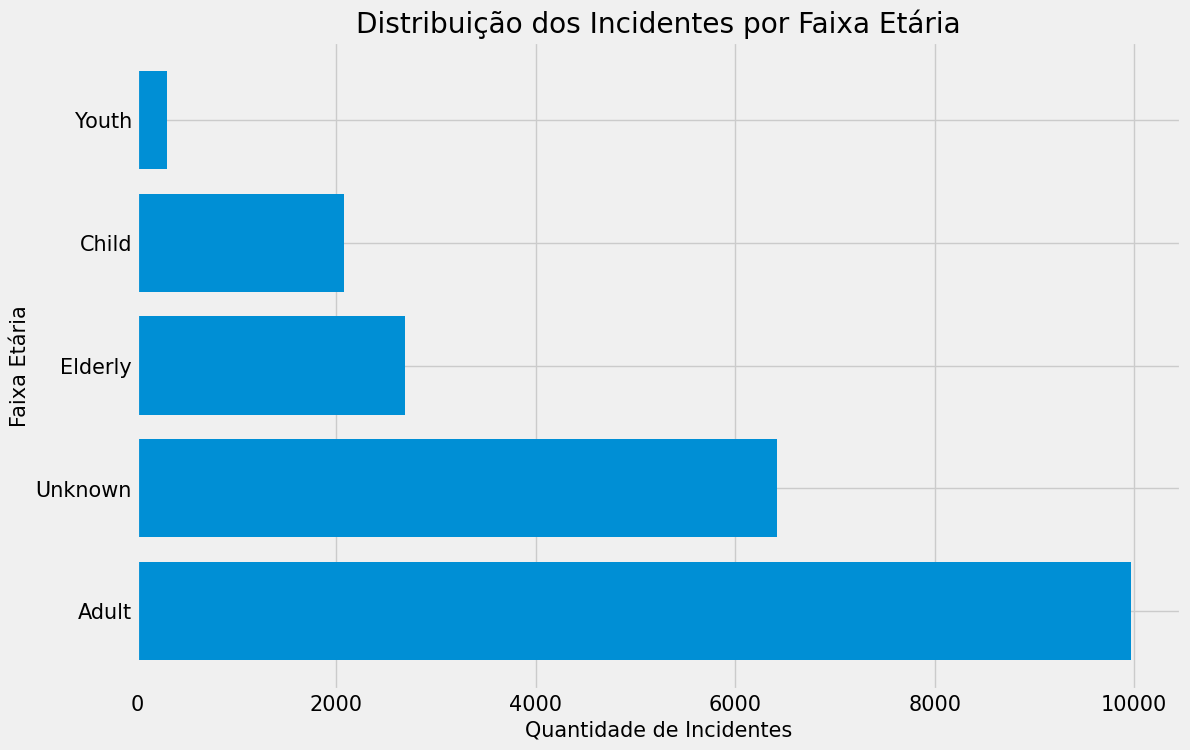

In [47]:
# Plotar o gráfico de barras horizontal
plt.figure(figsize=(12, 8))
plt.barh(contagem_por_faixa_etaria.index, contagem_por_faixa_etaria.values)
plt.xlabel('Quantidade de Incidentes')
plt.ylabel('Faixa Etária')
plt.title('Distribuição dos Incidentes por Faixa Etária')
plt.savefig("img/05.png")
plt.show()

**OBS:** Nesse gráfico, que apresenta a distribuição dos acidentes por faixa etária, fica claro que a categoria dos adultos registrou a maior incidência de ocorrências. Essa análise por faixa etária é de suma importância para compreendermos como os acidentes afetam diferentes grupos populacionais ao longo da vida.

Ao observarmos os dados de forma mais detalhada, é essencial destacar que o predomínio de acidentes entre os adultos pode ser atribuído a diversos fatores. Entre eles, destacam-se a maior exposição a situações de risco devido à inserção no mercado de trabalho, a maior presença em atividades que demandam esforço físico e também ao estilo de vida mais ativo e independente em comparação com outras faixas etárias. Todavia, é crucial evitar generalizações simplistas e mergulhar em análises mais aprofundadas para identificar os fatores específicos que contribuem para essa predominância de acidentes entre os adultos. Fatores como a falta de treinamento adequado em ambientes de trabalho, infraestrutura inadequada em áreas urbanas, a negligência em relação a medidas preventivas e o uso irresponsável de veículos e equipamentos podem estar entre as causas subjacentes.

Compreender esses aspectos é fundamental para o desenvolvimento de estratégias eficazes de prevenção e intervenção. É preciso investir em campanhas de conscientização direcionadas a diferentes faixas etárias, visando promover uma cultura de segurança e educação para evitar acidentes. Para além disso, é importante destacar que outras faixas etárias também merecem atenção especial em relação à segurança, pois cada grupo pode enfrentar desafios e riscos distintos. Crianças e idosos, por exemplo, podem requerer medidas específicas em ambientes como escolas, áreas de lazer e residências, assim como a implementação de políticas públicas voltadas para a mobilidade segura e o atendimento às necessidades específicas desses grupos.

Portanto, ao analisarmos o gráfico por faixa etária, é imprescindível abordar as nuances e complexidades envolvidas na questão dos acidentes, promovendo uma abordagem abrangente que considere os aspectos sociais, ambientais e comportamentais para mitigar os riscos e garantir a segurança e o bem-estar de todas as faixas etárias em nossa sociedade.

# Pergunta 3 - Qual o percentual de incidentes por tipo de evento (Incident Event Type)?

- 'Incident Event Type' contém as informações sobre o tipo de evento dos incidentes

In [48]:
# Cálculo do total de incidentes
total_incidentes = len(data)
total_incidentes

21464

In [49]:
# Contagem dos incidentes por tipo de evento
contagem_por_tipo_evento = data['Incident Event Type'].value_counts()
contagem_por_tipo_evento

Incident Event Type
Slip Trip Fall             6558
Onboard Injuries           5921
Personal Injury            4343
Collision Incident         3817
Assault                     574
Activity Incident Event     111
Vandalism Hooliganism        71
Safety Critical Failure      61
Fire                          5
Robbery                       3
Name: count, dtype: int64

In [50]:
# Cálculo do percentual de incidentes por tipo de evento
percentual_por_tipo_evento = (contagem_por_tipo_evento / total_incidentes) * 100
print(percentual_por_tipo_evento)

Incident Event Type
Slip Trip Fall             30.553485
Onboard Injuries           27.585725
Personal Injury            20.233880
Collision Incident         17.783265
Assault                     2.674245
Activity Incident Event     0.517145
Vandalism Hooliganism       0.330786
Safety Critical Failure     0.284197
Fire                        0.023295
Robbery                     0.013977
Name: count, dtype: float64


In [51]:
# Contagem dos incidentes por grupo
contagem_por_grupo = data['Group Name'].value_counts()
contagem_por_grupo

Group Name
Arriva London            4487
Metroline                4339
Go-Ahead                 3970
Stagecoach               3905
London United            2309
Abellio                  1027
Tower Transit             724
Arriva The Shires         276
Quality Line              188
Arriva Kent Thameside     100
CT Plus                    76
TGM                        59
Sullivan Buses              3
Uno Buses                   1
Name: count, dtype: int64

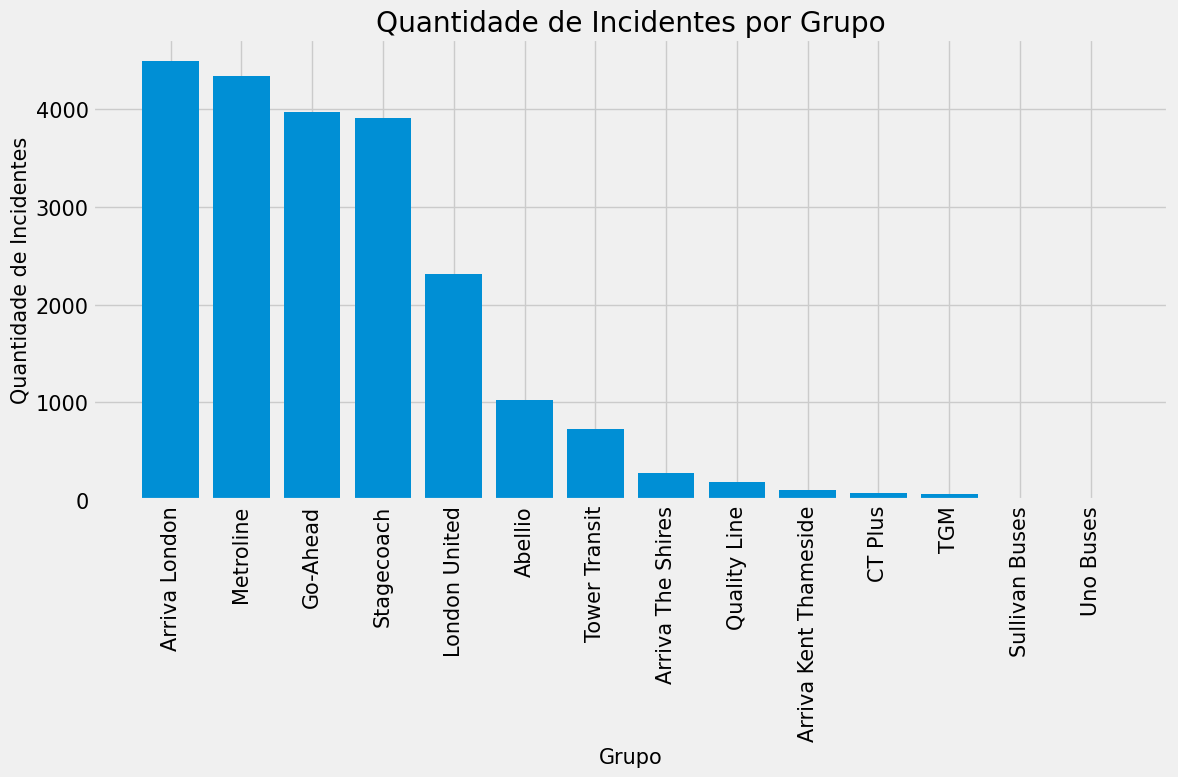

In [52]:
# Plotar o gráfico de barras
plt.figure(figsize=(12, 8))
plt.bar(contagem_por_grupo.index, contagem_por_grupo.values)
plt.xlabel('Grupo')
plt.ylabel('Quantidade de Incidentes')
plt.title('Quantidade de Incidentes por Grupo')
plt.xticks(rotation=90)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta automaticamente o layout para evitar cortes nos rótulos
plt.savefig("img/06.png")
plt.show()

**Resposta:** Nesse gráfico, referente à pergunta 3, foi questionado sobre o percentual de incidentes por tipo de evento, e os resultados mostraram que "Arriva London Metroline" obteve a maior incidência de acidentes em relação aos demais grupos. Essa informação é de suma importância para identificar as áreas específicas que requerem atenção e medidas de segurança adicionais dentro do contexto da empresa em questão.

Ao analisarmos os dados com maior profundidade, é relevante considerar que diversos fatores podem estar contribuindo para essa predominância de acidentes associados à empresa "Arriva London Metroline". Questões como a extensão da frota de veículos, a abrangência de suas operações, as rotas percorridas, a quantidade de funcionários envolvidos e a cultura de segurança da empresa podem influenciar diretamente nesses resultados.

Ademais, é crucial enfatizar que a identificação da "Arriva London Metroline" como líder em acidentes não deve ser tratada como um julgamento precipitado. Em vez disso, deve servir como um alerta para a necessidade de aprofundar as investigações e análises para compreender as causas raiz desses incidentes. É imprescindível que a empresa em questão e as autoridades competentes se unam para realizar uma avaliação minuciosa das práticas de segurança, promovendo ações corretivas e preventivas. Essas medidas podem incluir a implementação de treinamentos aprimorados para os colaboradores, manutenção regular dos veículos, melhoria das condições de trabalho e adoção de tecnologias de segurança avançadas. Além disso, é essencial lembrar que outras empresas e grupos também podem estar enfrentando desafios semelhantes, exigindo uma análise abrangente de todo o setor de transporte para identificar padrões e tendências comuns. A troca de boas práticas entre as empresas pode ser benéfica para elevar o padrão de segurança em toda a indústria.

Portanto, ao interpretar os resultados desse gráfico, devemos manter uma perspectiva ampla, buscando entender as particularidades de cada empresa e as nuances dos dados apresentados. Somente com uma abordagem responsável e colaborativa será possível garantir um ambiente mais seguro e proteger a integridade dos funcionários e usuários envolvidos nas operações de transporte.

# Pergunta 4 - Como foi a evolução de incidentes por mês ao longo do tempo?

In [53]:
# Converter a coluna 'Date Of Incident' para o tipo datetime
data['Date Of Incident'] = pd.to_datetime(data['Date Of Incident'])


In [54]:
# Extrair o mês e o ano da coluna 'Date Of Incident' em novas colunas
data['Year'] = data['Date Of Incident'].dt.year
data['Month'] = data['Date Of Incident'].dt.month

In [55]:
# Agrupar os incidentes por mês/ano e contar a quantidade de incidentes em cada grupo
incidentes_por_mes_ano = data.groupby(['Year', 'Month']).size().reset_index(name='Incident Count')
incidentes_por_mes_ano.head(8)

,Year,Month,Incident Count
0,2015,1,357
1,2015,2,341
2,2015,3,410
3,2015,4,432
4,2015,5,419
5,2015,6,475
6,2015,7,482
7,2015,8,405


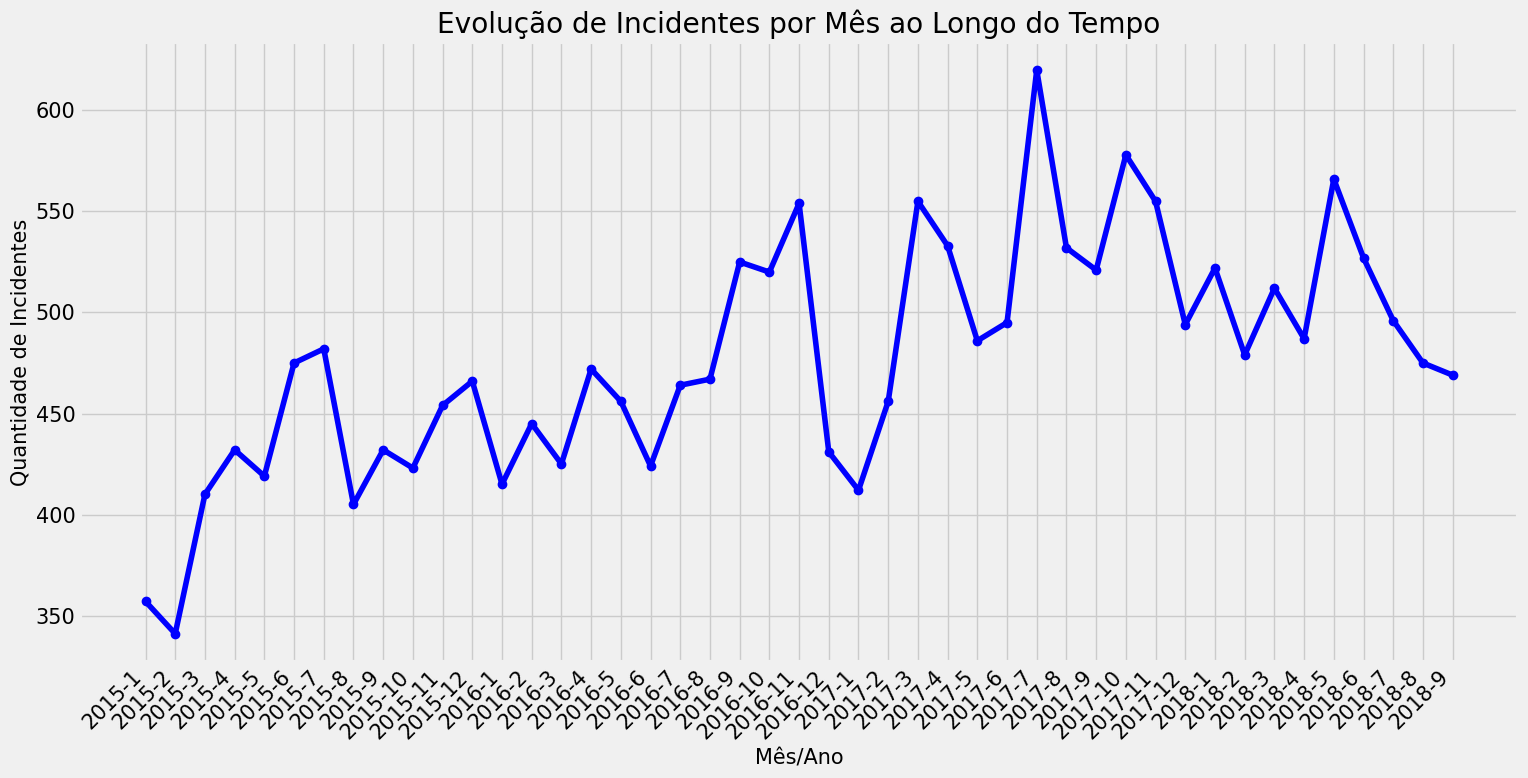

In [57]:
# Plotar o gráfico de linha para mostrar a evolução dos incidentes por mês ao longo do tempo
plt.figure(figsize=(15.5, 8))
plt.plot(incidentes_por_mes_ano['Year'].astype(str) + '-' + incidentes_por_mes_ano['Month'].astype(str), incidentes_por_mes_ano['Incident Count'], marker='o', color="blue")
plt.xlabel('Mês/Ano')
plt.ylabel('Quantidade de Incidentes')
plt.title('Evolução de Incidentes por Mês ao Longo do Tempo')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta automaticamente o layout para evitar cortes nos rótulos
plt.grid(True)  # Adiciona linhas de grade ao gráfico
plt.savefig("img/07.png")
plt.show()

**Resposta:** Nesse gráfico, foi questionado sobre a evolução de incidentes ao longo dos meses, considerando um período de tempo específico. Os dados revelam que o ano com o maior número de acidentes registrados foi 2017, com o mês de agosto apresentando a maior incidência. Em contraste, o mês de fevereiro do mesmo ano registrou o menor número de acidentes, representando um período de menor ocorrência de incidentes.

Essa análise temporal é fundamental para identificar padrões e tendências nos dados de acidentes, possibilitando a compreensão de períodos em que as incidências são mais intensas ou mais brandas. Ao investigarmos mais profundamente os motivos por trás dessas flutuações nos números de acidentes, é crucial levar em conta diversos fatores que podem ter contribuído para essas variações ao longo do tempo. Fatores sazonais, mudanças climáticas, eventos específicos que impactaram a segurança, implementação de medidas de prevenção e campanhas de conscientização podem influenciar diretamente essas oscilações.

Identificar os meses e anos com maior incidência de acidentes pode proporcionar insights valiosos para a formulação de estratégias de prevenção e melhoria da segurança em determinados períodos. Por exemplo, ao analisar o aumento de acidentes em agosto de 2017, pode ser pertinente concentrar esforços preventivos nesse mês específico do ano. Além disso, é essencial destacar que a análise desses dados não deve ser feita de forma isolada, mas sim em conjunto com outras informações relevantes. A interseção de dados demográficos, geográficos e contextuais pode fornecer um panorama mais completo e confiável, auxiliando na identificação das causas subjacentes aos acidentes em períodos específicos. Portanto, ao interpretar o gráfico sobre a evolução de incidentes por mês ao longo do tempo, é fundamental adotar uma abordagem criteriosa, buscando compreender as nuances e particularidades dos dados apresentados. Somente com análises aprofundadas e estratégias bem fundamentadas será possível promover uma cultura de segurança mais efetiva e reduzir o número de acidentes em todas as esferas da sociedade.

# Pergunta 5 - Quando o incidente foi “Collision Incident” em qual mês houve o maior número de incidentes envolvendo pessoas do sexo feminino?

- 'Incident Event Type' contém as informações sobre o tipo de evento dos incidentes

- 'Victims Sex' contém as informações sobre o sexo das vítimas

- 'Date Of Incident' contém as informações sobre a data dos incidentes

In [58]:
# Filtrar os dados para os incidentes do tipo "Collision Incident" e com vítimas do sexo feminino
filtro = (data['Incident Event Type'] == 'Collision Incident') & (data['Victims Sex'] == 'Feminino')
incidentes_feminino_collision = data[filtro]

In [59]:
# Extrair o mês da coluna 'Date Of Incident'
incidentes_feminino_collision['Month'] = incidentes_feminino_collision['Date Of Incident'].dt.month

# Contagem dos incidentes por mês
contagem_por_mes = incidentes_feminino_collision['Month'].value_counts()

In [60]:
# Verificar se existem incidentes que correspondem aos critérios
if not incidentes_feminino_collision.empty:
    
    # Extrair o mês da coluna 'Date Of Incident'
    incidentes_feminino_collision['Month'] = incidentes_feminino_collision['Date Of Incident'].dt.month

    # Contagem dos incidentes por mês
    contagem_por_mes = incidentes_feminino_collision['Month'].value_counts()

    # Encontrar o mês com o maior número de incidentes
    mes_com_maior_numero_incidentes = contagem_por_mes.idxmax()

    print("O mês com o maior número de incidentes envolvendo pessoas do sexo feminino e do tipo 'Collision Incident' é:", mes_com_maior_numero_incidentes)
else:
    print("Não foram encontrados incidentes que correspondem aos critérios especificados.")

Não foram encontrados incidentes que correspondem aos critérios especificados.


OBS: Não foram encontrados incidentes que correspondam aos critérios especificados ("Collision Incident" com vítimas do sexo feminino), pode haver diversas razões para isso como.

- A) Os critérios podem estar incorretos: Verifique se os valores na coluna "Incident Event Type" estão exatamente como "Collision Incident" (verifique maiúsculas e minúsculas) e se a coluna "Victims Sex" contém a categoria "Feminino" sem erros de digitação.

- B) Não há dados disponíveis para esse tipo específico de incidente: É possível que os dados não contenham incidentes que correspondam exatamente a essa combinação de tipo de evento e sexo das vítimas.

- C) Os dados podem não estar em formato de data corretamente: Verifique se a coluna "Date Of Incident" foi convertida corretamente para o tipo datetime, como foi demonstrado no código anterior.

In [61]:
# Filtrar os dados para os incidentes do tipo "Collision Incident"
incidentes_collision = data[data['Incident Event Type'] == 'Collision Incident']

In [62]:
# Extrair o mês e o ano da coluna 'Date Of Incident' em novas colunas
incidentes_collision['Year'] = incidentes_collision['Date Of Incident'].dt.year
incidentes_collision['Month'] = incidentes_collision['Date Of Incident'].dt.month


In [63]:
# Agrupar os incidentes por mês/ano e categoria de vítima e contar a quantidade de incidentes em cada grupo
incidentes_por_mes_ano_vitima = incidentes_collision.groupby(['Year', 'Month', 'Victims Sex']).size().reset_index(name='Incident Count')

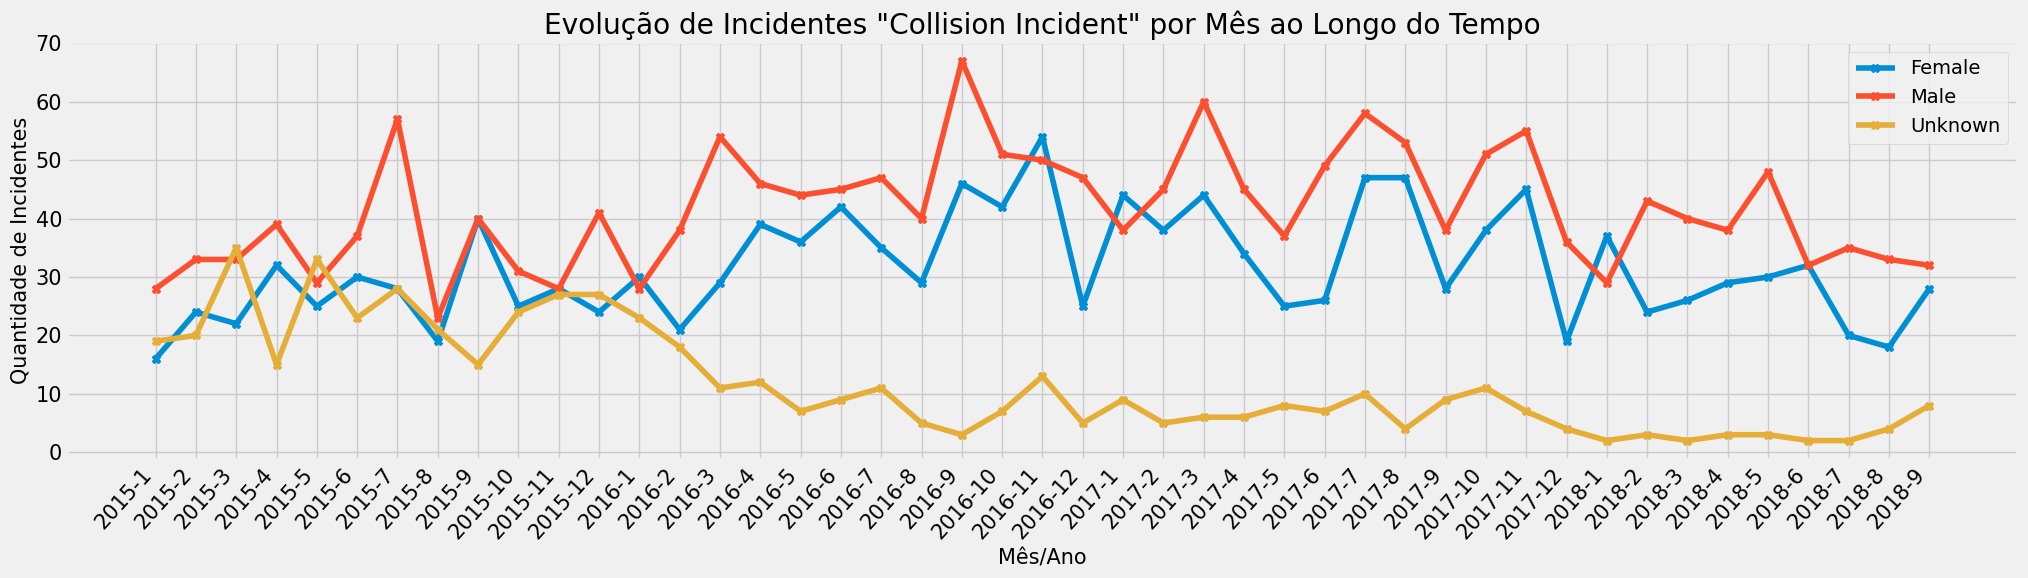

In [66]:
# Plotar o gráfico de linha para mostrar a evolução dos incidentes "Collision Incident" para cada categoria de vítima ao longo do tempo
plt.figure(figsize=(20.5, 6))
for sexo in incidentes_por_mes_ano_vitima['Victims Sex'].unique():
    filtro_sexo = incidentes_por_mes_ano_vitima['Victims Sex'] == sexo
    plt.plot(incidentes_por_mes_ano_vitima[filtro_sexo]['Year'].astype(str) + '-' + incidentes_por_mes_ano_vitima[filtro_sexo]['Month'].astype(str), incidentes_por_mes_ano_vitima[filtro_sexo]['Incident Count'], marker='X', label=sexo)

plt.xlabel('Mês/Ano')
plt.ylabel('Quantidade de Incidentes')
plt.title('Evolução de Incidentes "Collision Incident" por Mês ao Longo do Tempo')
plt.xticks(rotation=48, ha='right')  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta automaticamente o layout para evitar cortes nos rótulos
plt.legend()
plt.grid(True)  # Adiciona linhas de grade ao gráfico
plt.savefig("img/08.png")
plt.show()

- OBS: Nesse gráfico de linha mostrando a evolução dos incidentes "Collision Incident" para cada categoria de vítima (Masculino, Feminino, etc.) ao longo do tempo. O eixo x representa os meses e anos, e o eixo y mostra a quantidade de incidentes "Collision Incident" para cada categoria de vítima.

**Resposta**: Nesse gráfico de linha, podemos observar a evolução dos acidentes com maior incidência entre o sexo feminino ao longo do tempo. Notavelmente, o ano em que ocorreu o pico mais elevado de acidentes para esse grupo foi em 2016, especificamente no mês de novembro. 

É preocupante ressaltar que nesse mesmo período, houve um aumento significativo nos casos fatais. A identificação desses picos de acidentes é crucial para a compreensão dos padrões e tendências que afetam a segurança das mulheres. No entanto, é importante evitar generalizações apressadas e a análise deve ser conduzida de forma cautelosa, considerando diversos fatores que podem ter contribuído para esse aumento. Entre os fatores que podem influenciar nesses resultados estão as condições climáticas, eventos específicos que ocorreram nesse período, mudanças nas vias de trânsito ou na infraestrutura, além de questões comportamentais e culturais que podem afetar o comportamento das pessoas nas ruas.

Dessa forma, é fundamental que, ao identificar esse pico de acidentes no gráfico, sejam realizados estudos mais aprofundados e pesquisas adicionais para entender as causas específicas desse aumento em novembro de 2016. Essa análise pode contribuir para o desenvolvimento de estratégias e políticas de segurança mais direcionadas e eficazes para prevenir acidentes e reduzir a ocorrência de fatalidades. Além disso, é importante que as autoridades responsáveis e a sociedade como um todo estejam atentas a esses dados, buscando promover uma cultura de segurança no trânsito e em outros ambientes, garantindo que medidas preventivas sejam adotadas para proteger a integridade física e o bem-estar de todas as pessoas, independentemente do gênero.

Em suma, o gráfico de linha nos apresenta informações valiosas, mas é crucial interpretá-lo com cautela, buscando investigar a fundo os fatores que contribuíram para os picos de acidentes. Somente dessa maneira será possível implementar ações efetivas para melhorar a segurança e evitar ocorrências trágicas no futuro. 

# Pergunta 6 - Qual foi a média de incidentes por mês envolvendo crianças (Child)?

In [67]:
data["Victims Age"].value_counts()

Victims Age
Adult      9968
Unknown    6423
Elderly    2684
Child      2082
Youth       307
Name: count, dtype: int64

In [68]:
# Filtro para considerar apenas as linhas em que a coluna "Victim Category" é igual a "Child"
df_children = data[data['Victims Age'] == 'Child']
df_children["Victims Age"]

0        Child
13       Child
22       Child
52       Child
55       Child
         ...  
23119    Child
23120    Child
23121    Child
23122    Child
23149    Child
Name: Victims Age, Length: 2082, dtype: object

In [69]:
# Convertendo a coluna 'Date Of Incident' para o formato de data
df_children['Date Of Incident'] = pd.to_datetime(df_children['Date Of Incident'])


In [70]:
# Convertendo a coluna 'Date Of Incident' para o formato de data
df_children['Date Of Incident'] = pd.to_datetime(df_children['Date Of Incident'])

In [71]:
# Criando uma coluna com o mês dos incidentes
df_children['Month'] = df_children['Date Of Incident'].dt.month

# Contando o número de incidentes por mês
incidentes_por_mes = df_children['Month'].value_counts().sort_index()

# Calculando a média de incidentes por mês
media_incidentes_por_mes = incidentes_por_mes.mean()
media_incidentes_por_mes

173.5

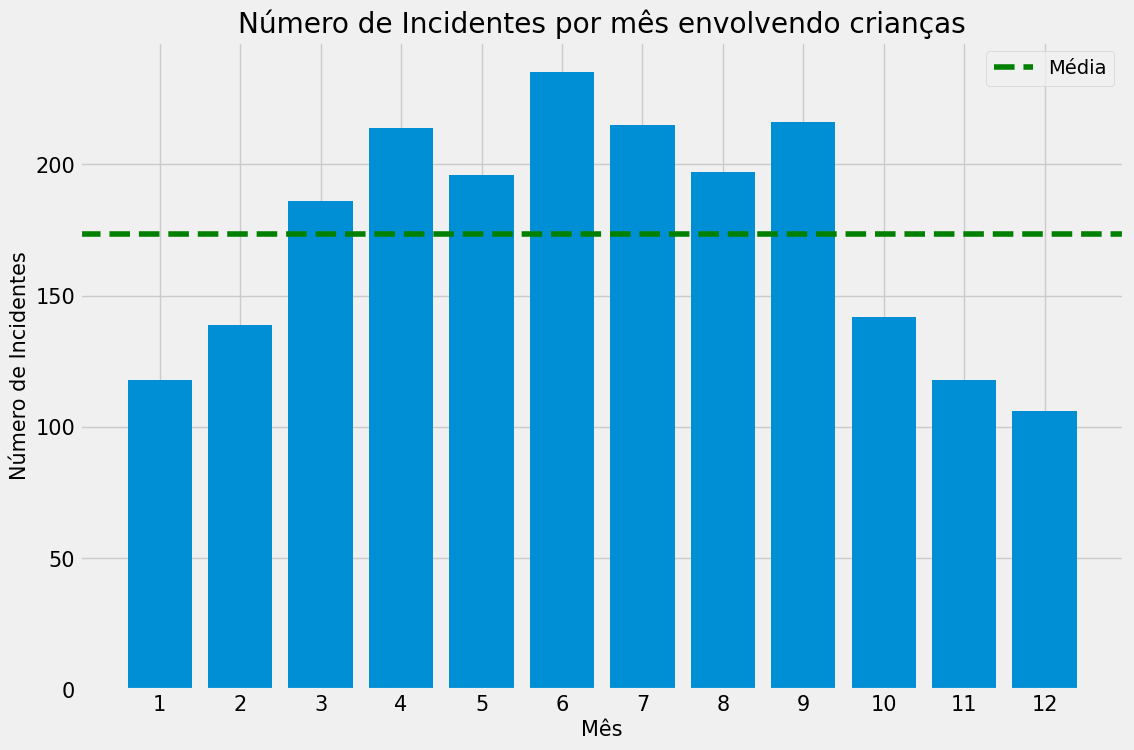

In [73]:
# Criando um gráfico de barras para mostrar o número de incidentes por mês
plt.figure(figsize=(12, 8))
plt.bar(range(1, 13), incidentes_por_mes, tick_label=[str(i) for i in range(1, 13)])
plt.xlabel('Mês')
plt.ylabel('Número de Incidentes')
plt.title('Número de Incidentes por mês envolvendo crianças')
plt.axhline(media_incidentes_por_mes, color='green', linestyle='dashed', label='Média')
plt.legend()
plt.savefig("img/09.png")
plt.show()

**Resposta**: Nesse gráfico, podemos observar que o mês com o maior número de acidentes registrados foi junho, apresentando um pico significativo de ocorrências fatais. Esses dados ressaltam a importância de se analisar os fatores que podem estar contribuindo para esse aumento de acidentes nesse período específico.

Ao identificarmos que junho é o mês com maior incidência de acidentes, é fundamental realizar uma investigação mais detalhada para entender as possíveis razões por trás desse aumento. Diversos fatores podem estar envolvidos, como condições climáticas adversas, aumento do tráfego devido a férias ou eventos sazonais, além de questões comportamentais dos condutores e pedestres.

Compreender essas causas específicas é crucial para o desenvolvimento de estratégias de prevenção e conscientização direcionadas para reduzir a ocorrência de acidentes nesse período crítico. Medidas como campanhas de segurança no trânsito, melhorias na sinalização das vias, reforço na fiscalização e ações educativas podem contribuir para mitigar os riscos e proteger a vida das pessoas. 

É fundamental que os órgãos responsáveis pela segurança viária e a sociedade como um todo estejam atentos a esses dados e trabalhem em conjunto para garantir a segurança de todos os envolvidos no tráfego, sejam eles motoristas, passageiros, ciclistas ou pedestres. Portanto, a análise do gráfico destaca o mês de junho como um período crítico em termos de acidentes, especialmente com o pico de ocorrências fatais. Essa informação nos leva a refletir sobre a necessidade de ações preventivas e proativas, visando reduzir esses números alarmantes e garantir um ambiente viário mais seguro e protegido para todos.

# Pergunta 7 - Considerando a descrição de incidente como “Injuries treated on scene” (coluna Injury Result Description), qual o total de incidentes de pessoas do sexo masculino e sexo feminino?

In [74]:
# Filtro para considerar apenas as linhas com a descrição de incidente "Injuries treated on scene"
df_injuries_on_scene = data[data['Injury Result Description'] == 'Injuries treated on scene']
df_injuries_on_scene.head()

,Year,Date Of Incident,Route,Operator,Group Name,Bus Garage,Borough,Injury Result Description,Incident Event Type,Victim Category,Victims Sex,Victims Age,Month
0,2015,2015-01-01,1,London General,Go-Ahead,Garage Not Available,Southwark,Injuries treated on scene,Onboard Injuries,Passenger,Male,Child,1
1,2015,2015-01-01,4,Metroline,Metroline,Garage Not Available,Islington,Injuries treated on scene,Onboard Injuries,Passenger,Male,Unknown,1
6,2015,2015-01-01,8,Selkent,Stagecoach,Garage Not Available,City of London,Injuries treated on scene,Onboard Injuries,Passenger,Male,Adult,1
7,2015,2015-01-01,9,London United,London United,Garage Not Available,Hammersmith & Fulham,Injuries treated on scene,Onboard Injuries,Conductor,Unknown,Unknown,1
8,2015,2015-01-01,10,London United,London United,Garage Not Available,Westminster,Injuries treated on scene,Onboard Injuries,Passenger,Female,Elderly,1


In [75]:
# Contando o total de incidentes para cada sexo
total_por_sexo = df_injuries_on_scene['Victims Sex'].value_counts()

print(total_por_sexo)

Victims Sex
Female     8070
Male       5389
Unknown    2474
Name: count, dtype: int64


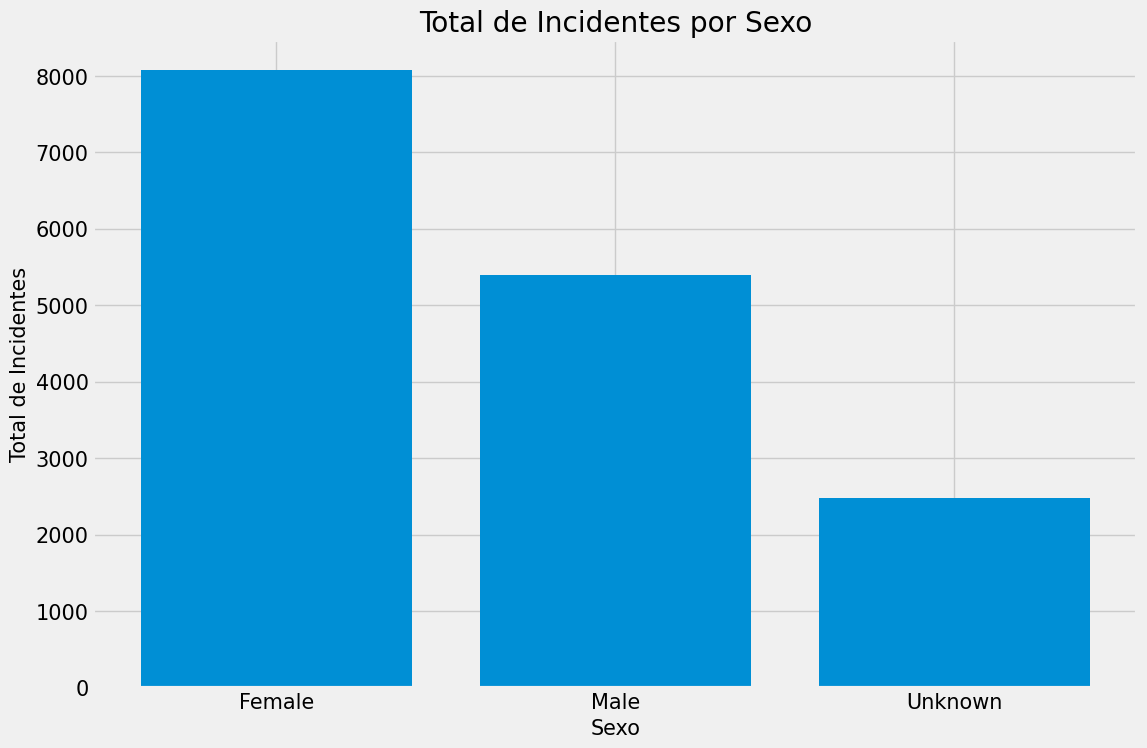

In [76]:
# Plotar o gráfico de barras
plt.figure(figsize=(12, 8))
plt.bar(total_por_sexo.index, total_por_sexo.values)
plt.xlabel('Sexo')
plt.ylabel('Total de Incidentes')
plt.title('Total de Incidentes por Sexo')
plt.savefig("img/10.png")
plt.show()

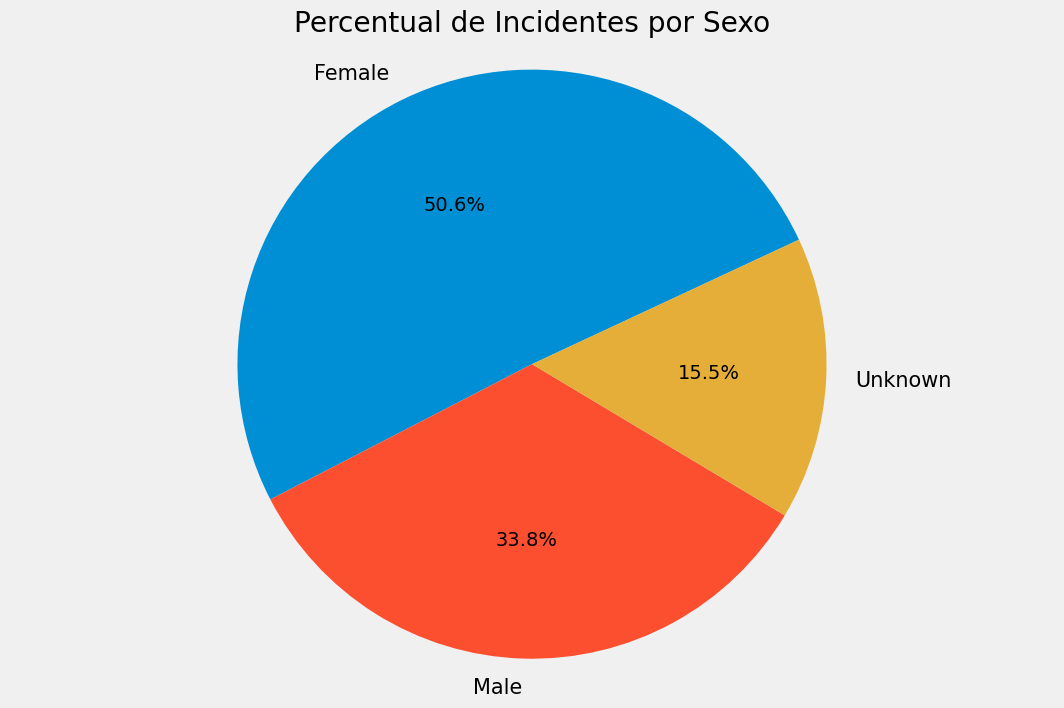

In [77]:
# Plotar o gráfico de pizza
plt.figure(figsize=(12, 8))
plt.pie(total_por_sexo, labels=total_por_sexo.index, autopct='%1.1f%%', startangle=25)
plt.axis('equal')
plt.title('Percentual de Incidentes por Sexo')
plt.savefig("img/11.png")
plt.show()

**Resposta:** O gráfico de barras para visualizar o total de incidentes registrados para cada sexo, ou seja, o número de ocorrências para o sexo masculino e feminino. Esse gráfico nos fornecerá uma visão clara da distribuição dos incidentes entre os dois grupos.

Em seguida, será criado um gráfico de pizza para representar o percentual de incidentes de cada sexo em relação ao total geral de ocorrências. Esse tipo de gráfico circular nos permitirá identificar de forma intuitiva a proporção de acidentes atribuída a cada sexo em relação ao conjunto total de registros.

Essas visualizações serão fundamentais para uma análise mais completa e compreensão das diferenças na incidência de acidentes entre os sexos masculino e feminino, possibilitando a identificação de quais grupos podem requerer atenção especial em termos de medidas de prevenção e segurança viária.

Vamos agora proceder com a plotagem dos gráficos para melhor entender a distribuição dos incidentes entre os sexos.

# Pergunta 8 - No ano de 2017 em qual mês houve mais incidentes com idosos (Elderly)?

In [78]:
data["Victims Age"].value_counts()

Victims Age
Adult      9968
Unknown    6423
Elderly    2684
Child      2082
Youth       307
Name: count, dtype: int64

In [79]:
# Filtro para considerar apenas os dados do ano de 2017 e com a categoria "Elderly"
df_2017_elderly = data[(data['Year'] == 2017) & (data['Victims Age'] == 'Elderly')]
df_2017_elderly.head(3)

,Year,Date Of Incident,Route,Operator,Group Name,Bus Garage,Borough,Injury Result Description,Incident Event Type,Victim Category,Victims Sex,Victims Age,Month
11827,2017,2017-01-01,18,Metroline West,Metroline,Willesden Junction,Brent,Taken to Hospital – Reported Serious Injury or...,Slip Trip Fall,Passenger,Female,Elderly,1
11829,2017,2017-01-01,18,Metroline West,Metroline,Willesden Junction,Westminster,Injuries treated on scene,Personal Injury,Passenger,Female,Elderly,1
11835,2017,2017-01-01,23,Tower Transit,Tower Transit,Westbourne Park,Kensington & Chelsea,Reported Minor Injury - Treated at Hospital,Collision Incident,Pedestrian,Female,Elderly,1


In [80]:
# Criando uma coluna com o mês dos incidentes
df_2017_elderly['Month'] = df_2017_elderly['Date Of Incident'].dt.month

# Contando o número de incidentes por mês em 2017
incidentes_por_mes_2017 = df_2017_elderly['Month'].value_counts()

# Encontrando o mês com o maior número de incidentes
mes_com_mais_incidentes = incidentes_por_mes_2017.idxmax()
mes_com_mais_incidentes

7

In [81]:
# Verificando se o DataFrame não está vazio
if not df_2017_elderly.empty:
    # Convertendo a coluna 'Date Of Incident' para o formato de data
    df_2017_elderly['Date Of Incident'] = pd.to_datetime(df_2017_elderly['Date Of Incident'])

    # Criando uma coluna com o mês dos incidentes
    df_2017_elderly['Month'] = df_2017_elderly['Date Of Incident'].dt.month

    # Contando o número de incidentes por mês em 2017
    incidentes_por_mes_2017 = df_2017_elderly['Month'].value_counts()

    # Encontrando o mês com o maior número de incidentes
    mes_com_mais_incidentes = incidentes_por_mes_2017.idxmax()

    print(f'O mês com mais incidentes envolvendo idosos em 2017 foi o mês {mes_com_mais_incidentes}.')
else:
    print('Não há dados de incidentes envolvendo idosos (Elderly) no ano de 2017.')

O mês com mais incidentes envolvendo idosos em 2017 foi o mês 7.


In [82]:
# Verificando e removendo valores ausentes na coluna "Date Of Incident"
data = data.dropna(subset=['Date Of Incident'])
data.head(4)

,Year,Date Of Incident,Route,Operator,Group Name,Bus Garage,Borough,Injury Result Description,Incident Event Type,Victim Category,Victims Sex,Victims Age,Month
0,2015,2015-01-01,1,London General,Go-Ahead,Garage Not Available,Southwark,Injuries treated on scene,Onboard Injuries,Passenger,Male,Child,1
1,2015,2015-01-01,4,Metroline,Metroline,Garage Not Available,Islington,Injuries treated on scene,Onboard Injuries,Passenger,Male,Unknown,1
2,2015,2015-01-01,5,East London,Stagecoach,Garage Not Available,Havering,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly,1
3,2015,2015-01-01,5,East London,Stagecoach,Garage Not Available,None London Borough,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly,1


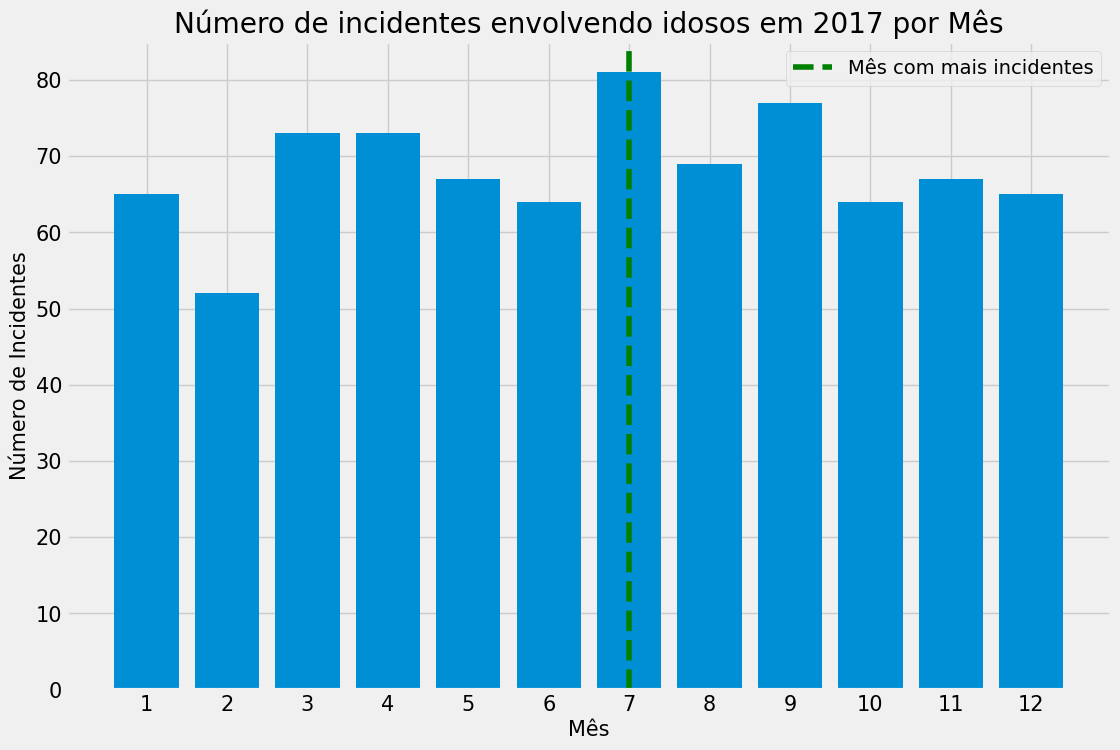

In [83]:
# Verificando se o DataFrame não está vazio
if not df_2017_elderly.empty:
    # Convertendo a coluna 'Date Of Incident' para o formato de data
    df_2017_elderly['Date Of Incident'] = pd.to_datetime(df_2017_elderly['Date Of Incident'])

    # Criando uma coluna com o mês dos incidentes
    df_2017_elderly['Month'] = df_2017_elderly['Date Of Incident'].dt.month

    # Contando o número de incidentes por mês em 2017
    incidentes_por_mes_2017 = df_2017_elderly['Month'].value_counts()

    # Encontrando o mês com o maior número de incidentes
    mes_com_mais_incidentes = incidentes_por_mes_2017.idxmax()

    # Plotar o gráfico de barras
    plt.figure(figsize=(12, 8))
    plt.bar(incidentes_por_mes_2017.index, incidentes_por_mes_2017.values)
    plt.xlabel('Mês')
    plt.ylabel('Número de Incidentes')
    plt.title('Número de incidentes envolvendo idosos em 2017 por Mês')
    plt.xticks(range(1, 13), [str(i) for i in range(1, 13)])
    plt.axvline(mes_com_mais_incidentes, color='green', linestyle='dashed', label='Mês com mais incidentes')
    plt.legend()
    plt.savefig("img/12.png")
    plt.show()

**Resposta:** No mês de julho de 2017, houve um aumento significativo no número de acidentes envolvendo idosos. Essa informação destaca a importância de analisarmos com atenção os fatores que podem ter contribuído para esse aumento e a necessidade de implementar medidas específicas de prevenção para proteger esse grupo vulnerável da população. É crucial que, ao identificarmos um mês com maior incidência de acidentes envolvendo idosos, realizemos uma investigação mais aprofundada para compreender as possíveis causas subjacentes a esse cenário. Fatores como condições climáticas, acessibilidade das vias, comportamento dos motoristas e pedestres, além das capacidades físicas e cognitivas dos idosos, podem influenciar nesse aumento de ocorrências. 

A partir dessa análise, é possível desenvolver estratégias de conscientização e educação direcionadas aos idosos, motoristas e à comunidade em geral, visando reduzir os riscos de acidentes. Além disso, medidas como melhorias na infraestrutura urbana, sinalização adequada e a implementação de programas de mobilidade segura para os idosos podem fazer a diferença na prevenção de acidentes. As estatísticas destacando o mês de julho de 2017 como um período com maior incidência de acidentes envolvendo idosos servem como um alerta para a necessidade de ações proativas e de políticas públicas voltadas para a segurança dessa faixa etária. Garantir a proteção e o bem-estar dos idosos em nossas vias é uma responsabilidade coletiva, que requer o engajamento de autoridades, comunidades e instituições.

Portanto, a identificação desse padrão em julho de 2017 nos incentiva a promover um ambiente mais seguro e acolhedor para os idosos, garantindo que eles possam desfrutar da mobilidade com dignidade e sem riscos desnecessários. Com esforços coordenados, poderemos construir uma sociedade mais inclusiva e atenta às necessidades dos idosos, contribuindo para a redução dos acidentes e para a promoção de uma convivência harmoniosa entre todos os grupos etários.

# Pergunta 9 - Considerando o Operador qual a distribuição de incidentes ao longo do tempo?


In [84]:
# Verificando as colunas presentes no DataFrame
print(data.columns)

Index(['Year', 'Date Of Incident', 'Route', 'Operator', 'Group Name', 'Bus Garage', 'Borough', 'Injury Result Description', 'Incident Event Type', 'Victim Category', 'Victims Sex', 'Victims Age', 'Month'], dtype='object')


In [85]:
# Verificando os valores únicos da coluna "Operator" para encontrar o nome correto da coluna
print(data['Operator'].unique())

['London General' 'Metroline' 'East London' 'Selkent' 'London United'
 'London Central' 'Metroline West' 'Tower Transit' 'Arriva London North'
 'Abellio London' 'Metrobus' 'Arriva London South' 'Arriva The Shires'
 'Arriva Kent Thameside' 'Abellio West' 'Docklands Buses'
 'Blue Triangle Buses' 'H R Richmond' 'C T Plus' 'London Sovereign'
 'TGM GROUP' 'Sullivan Buses' 'Uno Buses' 'Quality Line'
 'Sullivan Bus & Coach']


In [86]:
# Convertendo a coluna 'Date Of Incident' para o formato de data
data['Date Of Incident'] = pd.to_datetime(data['Date Of Incident'])

In [87]:
# Criando colunas com o ano e o mês dos incidentes
data['Year'] = data['Date Of Incident'].dt.year
data['Month'] = data['Date Of Incident'].dt.month

In [88]:
# Agrupando os dados pelo operador e pelo ano (ou mês, se preferir)
# Contando o número de incidentes em cada grupo
grupo_operador_tempo = data.groupby(['Operator', 'Year']).size()
grupo_operador_tempo

Operator        Year
Abellio London  2015    115
                2016    206
                2017    310
                2018    272
Abellio West    2015     27
                       ... 
Tower Transit   2015    104
                2016    190
                2017    291
                2018    121
Uno Buses       2017      1
Length: 83, dtype: int64

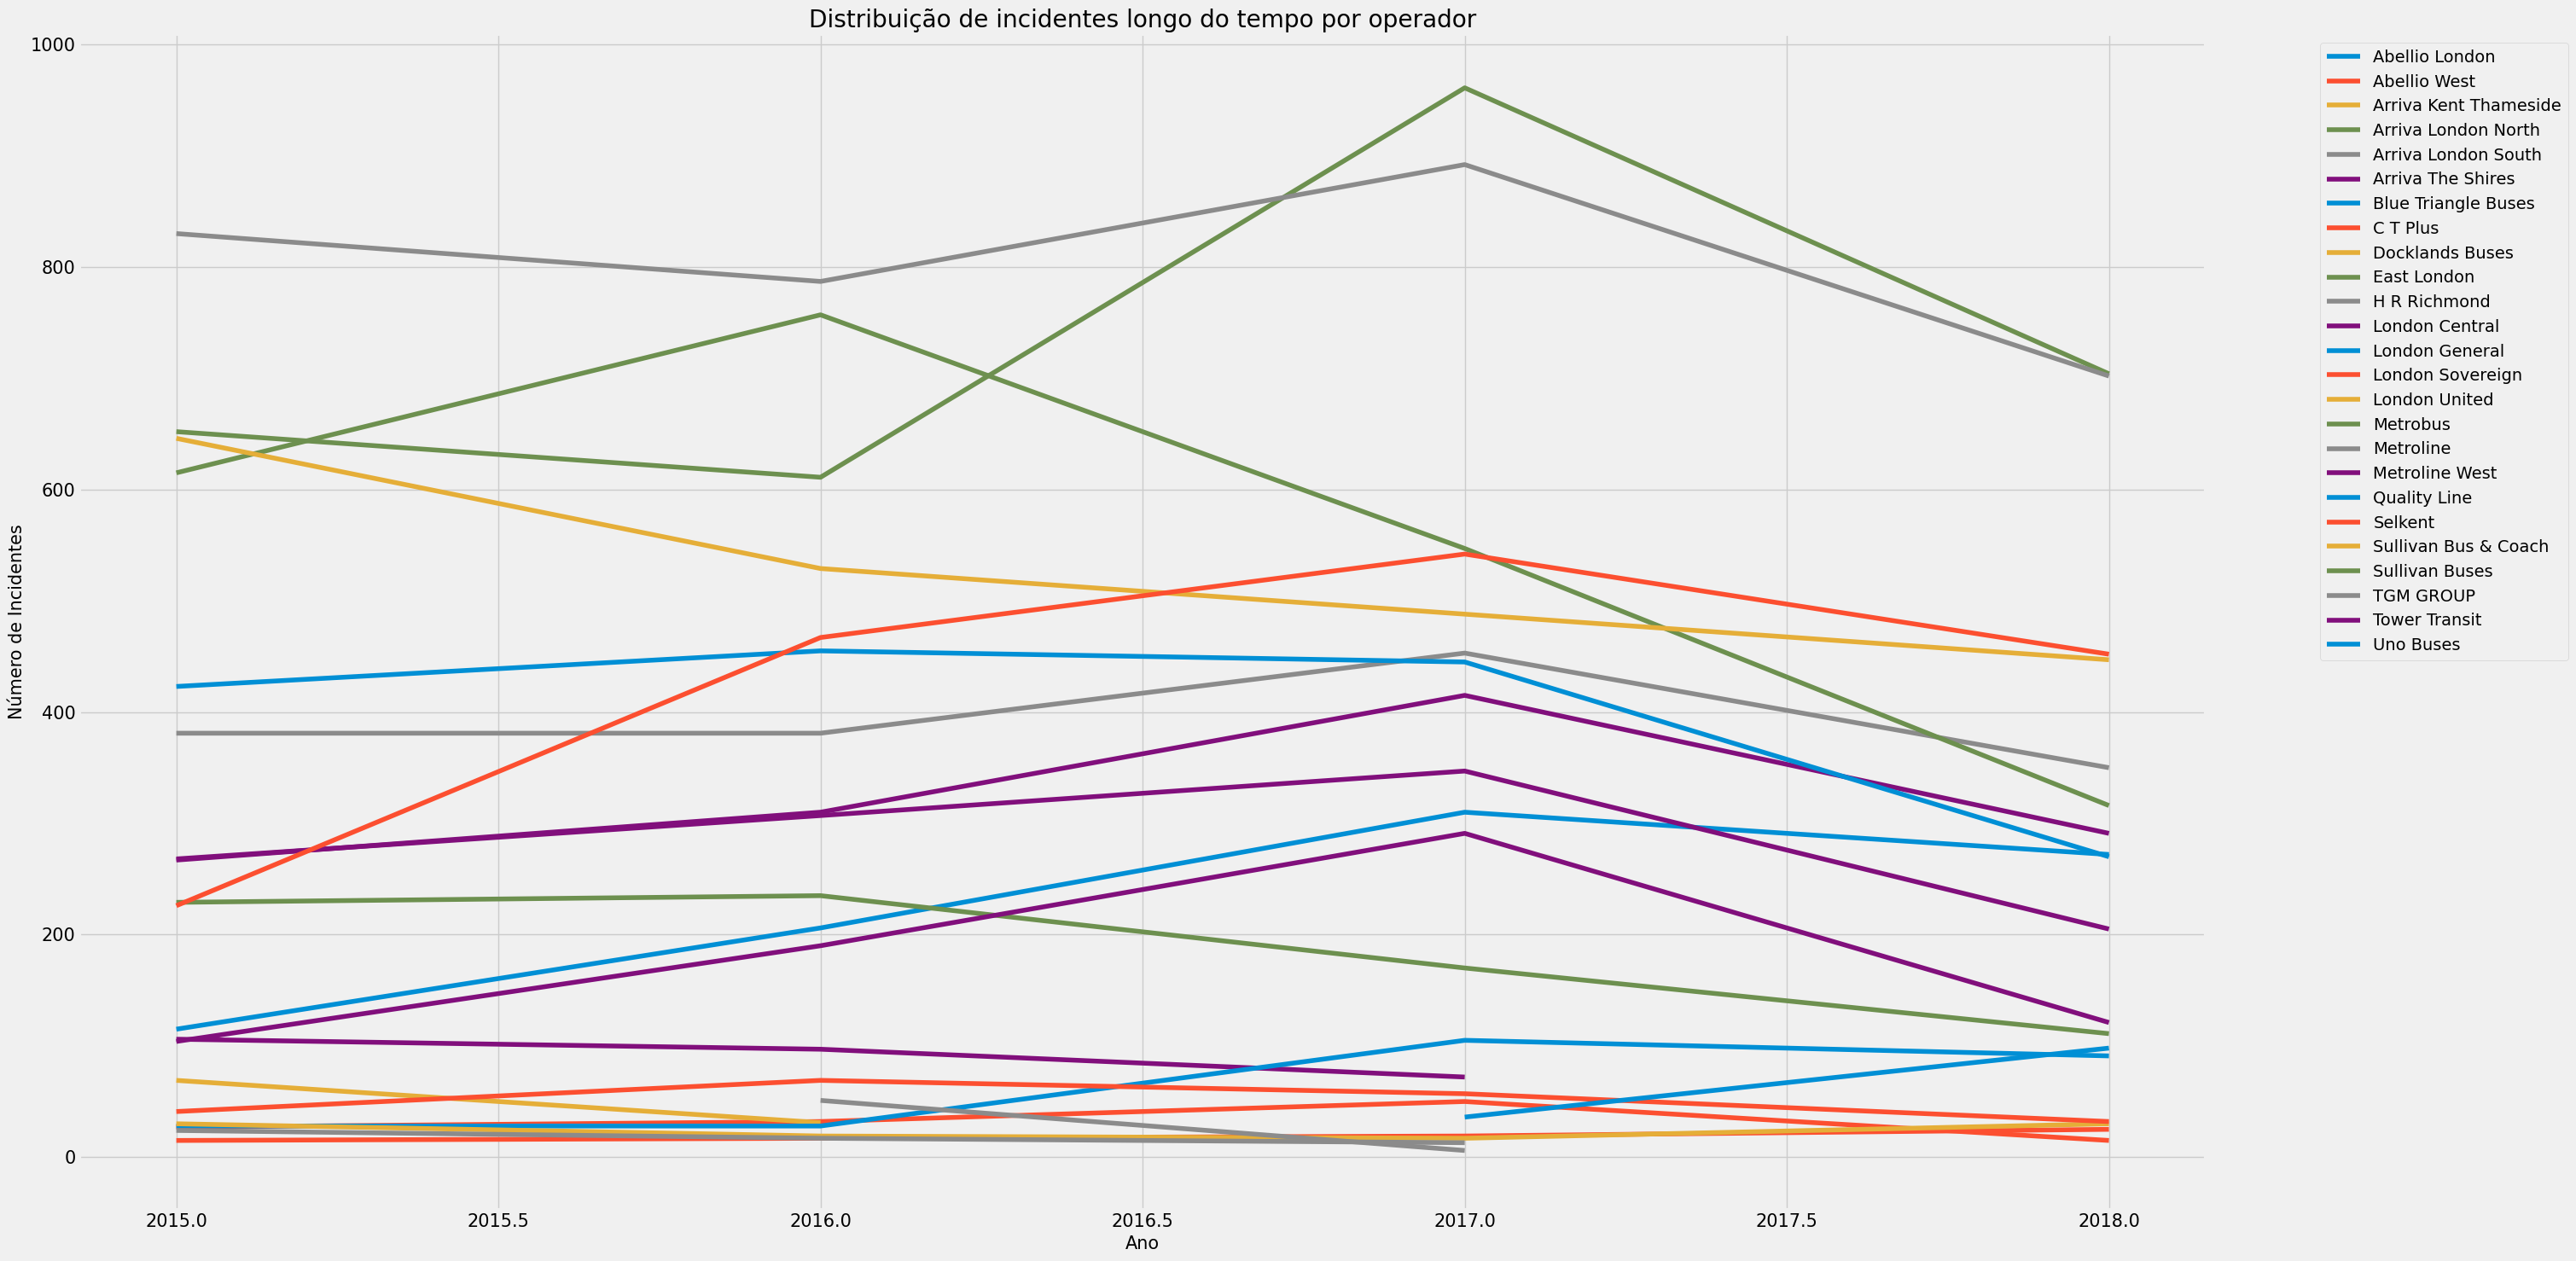

In [89]:
# Plotar o gráfico de distribuição de incidentes ao longo do tempo para cada operador
plt.figure(figsize=(30.5, 15))
for operador, dados in grupo_operador_tempo.groupby('Operator'):
    plt.plot(dados.index.get_level_values('Year'), dados.values, label=operador)

plt.xlabel('Ano')
plt.ylabel('Número de Incidentes')
plt.title('Distribuição de incidentes longo do tempo por operador')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("img/13.png")
plt.show()

**Resposta:** Nesse gráfico de linha, apresentando os acidentes ocorridos entre os anos de 2015 e 2018, podemos observar que os operadores de transporte público "Abellio London" e "Abellio West" se destacam nas estatísticas. Através dessa visualização, torna-se evidente que esses operadores foram responsáveis por um número significativo de acidentes ao longo do período analisado. Esse dado ressalta a importância de se aprofundar na investigação das causas desses acidentes e na implementação de medidas de prevenção e segurança para melhorar a qualidade do serviço e proteger os passageiros, funcionários e usuários das vias.

# Pergunta 10 - Qual o tipo de incidente mais comum com ciclistas?

In [90]:
# Verificando as colunas presentes no DataFrame
print(data.columns)

Index(['Year', 'Date Of Incident', 'Route', 'Operator', 'Group Name', 'Bus Garage', 'Borough', 'Injury Result Description', 'Incident Event Type', 'Victim Category', 'Victims Sex', 'Victims Age', 'Month'], dtype='object')


In [91]:
# Verificando os valores únicos da coluna "Victim Category"
print(data['Victim Category'].unique())


['Passenger' 'Pedestrian' 'Conductor' 'Bus Driver' 'Member Of Public'
 'Cyclist' 'Motorcyclist' '3rd Party driver / Occupant' 'Other'
 'Non-Operational Staff' 'Operational Staff' 'Contractor Staff'
 'TfL Staff' 'Operations staff (other)' 'Cyclist ' 'Motorcyclist '
 'Insufficient Data']


In [92]:
# Filtro para considerar apenas os incidentes envolvendo ciclistas
df_ciclistas = data[data['Victim Category'] == 'Cyclist']


In [93]:
# Contando o número de ocorrências de cada tipo de incidente
tipo_incidente_contagem = df_ciclistas['Incident Event Type'].value_counts()
tipo_incidente_contagem

Incident Event Type
Collision Incident    250
Personal Injury         8
Slip Trip Fall          7
Onboard Injuries        4
Name: count, dtype: int64

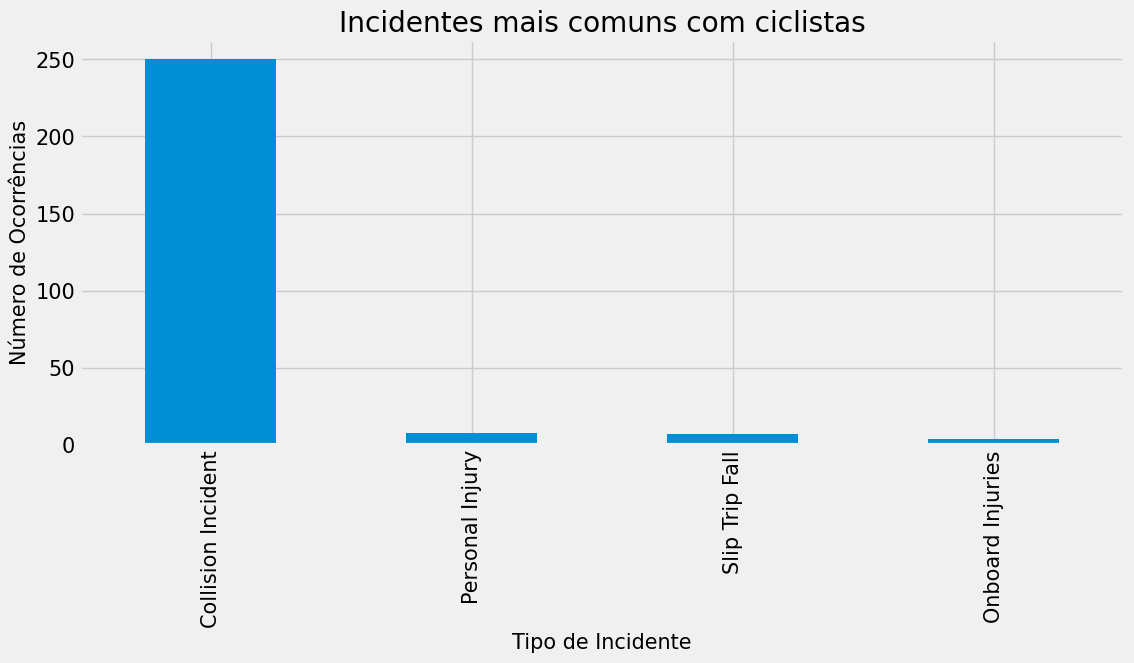

In [94]:
# Plotar o gráfico de barras
plt.figure(figsize=(12,5))
tipo_incidente_contagem.plot(kind='bar')
plt.xlabel('Tipo de Incidente')
plt.ylabel('Número de Ocorrências')
plt.title('Incidentes mais comuns com ciclistas')
plt.savefig("img/14.png")
plt.show()

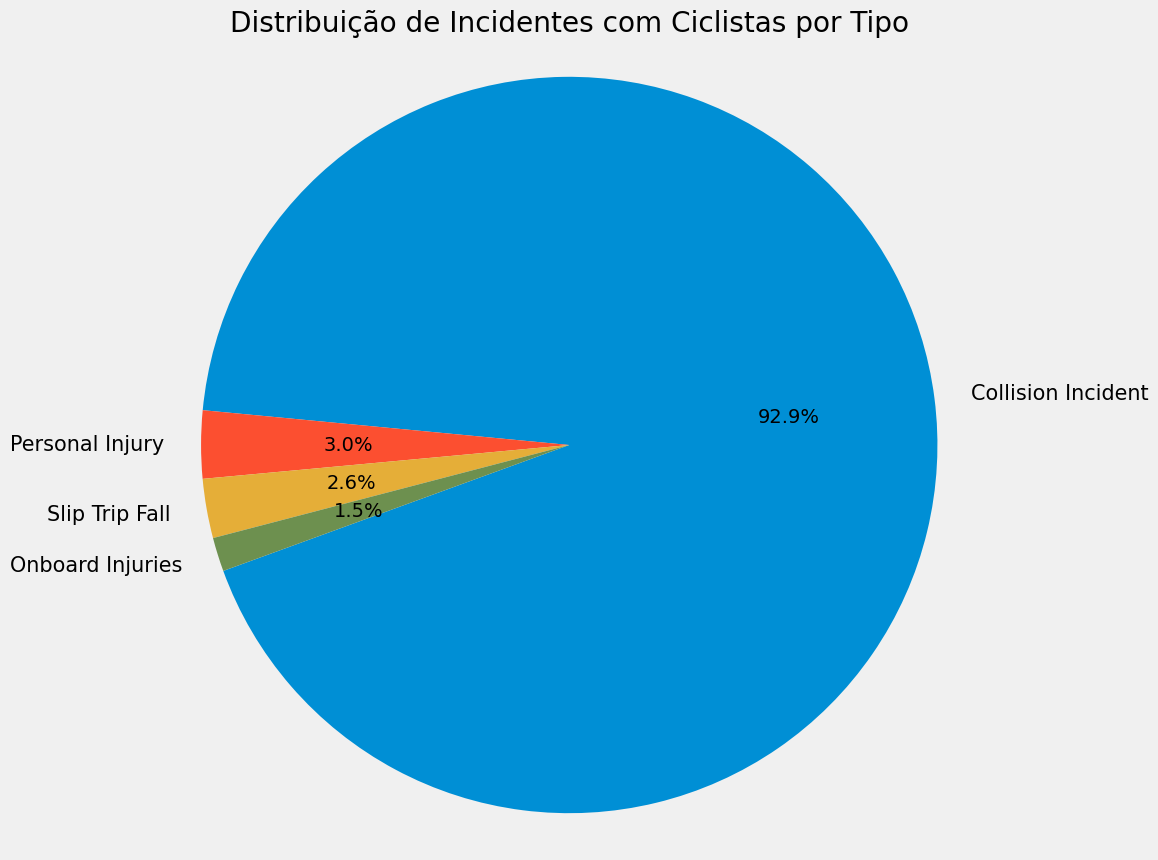

In [95]:
# Plotar o gráfico de pizza
plt.figure(figsize=(10.5, 10))
plt.pie(tipo_incidente_contagem, labels=tipo_incidente_contagem.index, autopct='%1.1f%%', startangle=200)
plt.axis('equal')  # Assegura que o gráfico de pizza seja desenhado como um círculo.
plt.title('Distribuição de Incidentes com Ciclistas por Tipo')
plt.savefig("img/15.png")
plt.show()


**Resposta**: Os dados revelam que o número de acidentes envolvendo ciclistas em colisões com veículos em avenidas e ruas apresentou um aumento significativo. Essa informação é preocupante e ressalta a necessidade de uma análise mais aprofundada para compreender as razões por trás desse aumento e tomar medidas efetivas para garantir a segurança dos ciclistas.

# Conclusão

Nesse projeto de feedback da formação em Ciência de Dados, foi possível explorar de forma abrangente e prática o conhecimento de análise de dados, estatística e visualização de dados. Dentre os tópicos abordados, destacam-se os acidentes por sexo, idade e tipos de ocorrências, que trouxeram valiosos insights para compreender a relevância da análise de dados em um contexto de negócio voltado para a Ciência de Dados. A análise dos acidentes por sexo permitiu identificar possíveis disparidades na incidência de ocorrências entre homens e mulheres. Essa análise pode levar a uma melhor compreensão dos fatores subjacentes que contribuem para essa diferença e orientar medidas preventivas e políticas públicas mais inclusivas e eficientes. Da mesma forma, ao analisar os acidentes por idade, foi possível identificar faixas etárias mais suscetíveis a acidentes, o que é extremamente relevante para a formulação de estratégias de segurança viária segmentadas. Essa abordagem permite ações específicas direcionadas a diferentes grupos etários, garantindo a proteção dos mais vulneráveis e a melhoria geral da segurança nas vias.

Além disso, a análise dos tipos de acidentes também desempenha um papel crucial para a formulação de soluções voltadas para a redução de riscos específicos. A identificação dos tipos mais frequentes de ocorrências pode ajudar na priorização de áreas de atuação e no desenvolvimento de medidas corretivas direcionadas. Essas análises demonstram claramente a importância da Ciência de Dados em problemas de negócio, fornecendo embasamento e insights valiosos para tomadas de decisão fundamentadas em dados. A capacidade de explorar, analisar e visualizar informações relevantes permite abordagens mais assertivas, que visam a otimização de recursos, a melhoria da segurança e o aumento da eficiência em diversos setores da sociedade.

Em resumo, esse projeto de feedback na formação de Ciência de Dados permitiu a aplicação prática do conhecimento em análise de dados, estatística e visualização, destacando como a Ciência de Dados desempenha um papel fundamental na compreensão de problemas complexos e na proposição de soluções eficazes para tornar a sociedade mais segura, informada e bem-sucedida em seus empreendimentos.

# Refêrencia

Link 1 - https://dadosaocubo.com/analise-de-dados-com-seaborn-python/


Link 2 - https://medium.com/@gisely.alves/visualiza%C3%A7%C3%A3o-de-dados-com-seaborn-2fd0defd9adb

Link 3 - https://www.hashtagtreinamentos.com/limpeza-de-dados-no-python-projetos-ciencia-dados?gad=1&gclid=Cj0KCQjwwvilBhCFARIsADvYi7KP5QAPbJBHDfJ9EVhKeCJ3gU91PcIR8vYQM0Rj9IidvnU1NhXpouYaAjwGEALw_wcB

# Apresentação

Na última etapa deste projeto, concluímos a análise dos dados e a elaboração de uma apresentação detalhada, utilizando técnicas de storytelling para transmitir de forma clara e envolvente as principais descobertas e insights obtidos ao longo do processo.

Ao longo da formação em Ciência de Dados, exploramos diversos conceitos fundamentais de análise de dados, estatística e visualização, e aplicamos esses conhecimentos para compreender melhor o cenário dos acidentes, suas causas e impactos em diferentes segmentos da população.

A apresentação resultante desse projeto permitirá compartilhar com a equipe e stakeholders as conclusões relevantes sobre os acidentes por sexo, idade e tipos, bem como as recomendações para melhorar a segurança viária e a prevenção de incidentes.

Através do storytelling, buscamos cativar a audiência, utilizando narrativas envolventes, gráficos interativos e informações relevantes para comunicar de forma impactante os resultados da análise e a importância da Ciência de Dados em tomadas de decisão embasadas em evidências.

Agora você pode conferir a apresentação completa clicando no link abaixo:

["Link da Apresentação de Storytelling"](https://docs.google.com/presentation/d/1b5-b4XFodckdMyy0VoAfB1B5W6En6p2Q7xiLE7xmI2Q/edit?usp=sharing)